<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Problemas de clasificación y  regresión.
* Selección de atributos y parámetros de regularización en regresión lineal (Ridge y Lasso).
* Validación cruzada.
* PCA e ICA versus LDA. Reducción de dimensionalidad para clasificación.
* Selección de hı́per-parámetros estructurales en Regresión Logı́stica y Perceptrón.
* LDA, QDA, Naive Bayes en texto, clasificadores bayesianos ingenuos (Bernoulli, Multinomial)
* Preprocesamiento de datos brutos y representaciones de entrada.
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 26 de Octubre y 29 de Octubre respectivamente.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF393-II-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Aprendizaje con regresión lineal  
[2.](#segundo) Análisis de audios como datos brutos  
[3.](#tercero) Análisis de emociones en tweets

<a id="primero"></a>
## 1. Aprendizaje con regresión lineal.

El modelo de regresión lineal  es una combinación lineal entre variables independientes para obtener otra variable, dependiente de éstas. Lo cual puede resultar bastante simple, pero, hoy en día, ha podido ser aplicado a varios problemas con buenos resultados, como predicción en finanzas y en medicina. Sin embargo, también puede ser un medio para aplicar un modelo más grande, por ejemplo utilizarlo para que, con el resuido, detectar *outliers*, rellenar vacíos/datos incompletos o aprender un *score* para ranquear objetos, lo que haremos en esta sección.

<img src="http://chanakya.ca/wp-content/uploads/2018/05/EstimateMultipleLinearRegressionCoefficientsExample_01.png" height="15%" />


El problema de *learning to rank* es aplicado comúnmente en *Information Retrieval* (IR). Sin embargo, el aprender ésta función puede ser crucial para modelar la importancia de distintos objetos.  


En esta actividad trabajaremos con el problema de predecir el *ranking* mundial de una Universidad en base a distintas características de ésta (dataset *World University Rankings*, a través del siguiente __[link](https://www.kaggle.com/mylesoneill/world-university-rankings)__) en la plataforma de *Kaggle*. En este problema el *ranking* es una medición de qué tan buena es la universidad e intentaremos predecirla a través un modelo simple de regresión lineal. En particular, dentro de los miles de diferentes sistemas de rankings, nacionales e internacionales, entre los cuales comúnmente existen desacuerdos entre ellos, trabajaremos con el ranking ampliamente considerado como uno de las más influyentes y ampliamente observadas: *Times Higher Education World University* .


> a) Cargue los datos a analizar, descargándolos desde la plataforma como se indicó, en formato *dataframe pandas*. Descríbalos adecuadamente, ya sea la variable dependiente o las independientes, si es que lo son.
```python
import pandas as pd
df = pd.read_csv("world-university-rankings/timesData.csv")
df.shape
df.describe()
```

> b) Debido a la estructura será necesario realizar un leve pre-proceso. Existen vacíos entre los datos o valores '-', por lo que será necesario eliminarlos (*o si piensa una mejor manera de manejar ésto puede hacerlo, se verá reflejado en su nota*). Además de ésto deje los datos con *score unkown* o '-' en un conjunto *target* separado, *unlabeled data* (éste será el objetivo del entrenamiento) ¿Cuántos datos quedan en cada conjunto? 
```python
def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x
df.dropna(axis=0,inplace=True,how='any') #borra nan
df["total_score"] = df3["total_score"].apply(lambda x: x.replace('-','unknown')) #rellena 
df = df[~(df == '-').any(axis=1)] #elimina filas con valores nulos
...
nuevo_df  = pd.get_dummies(df, columns=["country"]) #column to categorical
....
nuevo_df['female'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
nuevo_df['male'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt)
nuevo_df['female_male_ratio'] =  np.where(nuevo_df['male'] == 0, 0, nuevo_df['female']/nuevo_df['male']) #si no hay (rellena 0) 
nuevo_df['num_students'] = nuevo_df['num_students'].apply(lambda x: int(str(x).replace(',','')))
nuevo_df['international_students'] = nuevo_df['international_students'].apply(lambda x: int(str(x).replace('%','')))
print(nuevo_df.shape)
...
df_test = nuevo_df[nuevo_df["total_score"]=='unknown']  #para predecir al final
nuevo_df =  nuevo_df[nuevo_df["total_score"]!='unknown'] #elimina unknown rank..
print(nuevo_df.shape)
nuevo_df.head()
```

> c) Cree las matrices de cada conjunto con las que trabajará. Además de ésto separe el conjunto de pruebas fijo que se utilizará, recuerde que éste no puede ser utilizado. Si estima conveniente también cree conjunto de validación.
```python
Y = nuevo_df['total_score'].values
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).values
X_test = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
Y = Y.astype('float32')
X = X.astype('float32')
X_test = X_test.astype('float32')
X.shape
...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
...
validation_set = #if you want to create val!
```

> d) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar ésto.
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
```

> e) Realice una regresión lineal de mı́nimos cuadrados básica. Mida el residuo de cada predicción en cada dato y haga un gráfico de éste ¿Qué indica lo observado?
```python
from sklearn.linear_model import LinearRegression as LR
linreg = LR(fit_intercept=True, n_jobs=1)
linreg.fit(X_train_scaled,y_train)
...
import seaborn as sns
res = y_train-linreg.predict(X_train_scaled)
sns.distplot(res)
```

> f) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? Compare y comente ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?

> g) Calcule la información mútua de los distintos predictores (variables) con respecto a la variable *output* o *target*. Comente con lo calculado anteriormente y se le parece razonable.
```python
from sklearn.feature_selection import mutual_info_regression
minfo_predictor = mutual_info_regression(X,y)
```

> h)  Construya una función que implemente *Forward Step-wise Selection* (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo. Ordene el eje $x$ de menor a mayor.
```python
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
fss(X_train_scaled,y_train,names_regressors)
```

> i) Ajuste un modelo lineal utilizando “*Ridge Regression*”, es decir, regularizando con la norma $l_2$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^0, 10^6$], variando si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Deje un gráfico sólo para analizar los coeficientes de los países. Describa lo que observa.
```python
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend()
plt.show()
...#modify
if "country" in label:
    plt.plot(alphas_, y_arr, label=label)
plt.title('Regularization Path RIDGE of country coefs')
```

> j) Ajuste un modelo lineal utilizando el método “*Lasso*”, es decir, regularizando con la norma $l_1$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^{-2},10^3$]. Para obtener el código, modifique el ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?
```python
from sklearn.linear_model import Lasso
alphas_ = np.logspace(-2,3,base=10)
model = Lasso(fit_intercept=True)
...
country_alphas_ = np.logspace(-5,0,base=10)
```
> k) Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un gráfico que muestre el error de entrenamiento y el de pruebas como función del parámetro de regularización. Discuta lo que  observa.
```python
alphas_ = #choose it
coefs = []
model = #choose it
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    yhat_train = model.predict(X_train_scaled)
    yhat_test = model.predict(X_test_scaled)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge/lasso')
ax.plot(alphas_,mse_test,label='test error ridge/lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()
```

> l) Estime el valor del parámetro de regularización en **alguno** de los modelos anteriores haciendo uso de la técnica validación cruzada con un número de folds igual a $K= 5$ y $K = 10$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Mida el error real del modelo (ésto es sobre el conjunto de pruebas). Debido a la escala del error puede utilizar auxiliarmente *MAE* como métrica de desempeño. Compare y concluya.
```python
yhat_test = linreg.predict(X_test_scaled)
mse_test = np.mean(np.power(yhat_test - y_test, 2))
from sklearn.model_selection import KFold
K=10
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(X_train_scaled):
    linreg = LR(fit_intercept=True, n_jobs=1)
    linreg.fit(X_train_scaled[train], y_train[train])
    yhat_kfold_val = linreg.predict(X_train_scaled[val])
    mse_fold = np.mean(np.power(yhat_kfold_val - y_train[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / K
...#or MAE
mae_fold = np.mean(np.abs(yhat_kfold_val - y_train[val]))
```

> m) Con el modelo que se piense que es el mejor, en base a todo lo experimentado. Realice el *ranking* de las universidades del que no se tienen etiquetas (*unlabeled data* o *target data*) a través de predecir los datos que se dejaron como *pruebas* y ordenar su score en el *dataframe*.
```python
df_test["total_score"] = model.predict(X_test_scaled) #predict score
...#armar un raking
univ_chilenas = df_test[df_test["country_Chile"]==1]
rannking_univ_ch = univ_chilenas.sort_values(by="total_score",ascending=False)
ranking = 1
for index,row in rannking_univ_ch.iterrows():
    print("%d - Institucion: %s" %(ranking,row["university_name"]))
    ranking+=1
```

<a id="segundo"></a>
## 2. Análisis de audios como datos brutos

Distintos tipos de datos han sido tratados en el área de Machine Learning, donde el análisis de estos y
el manejo para poder dejarlos en una representación que se pueda entregar como entrada al algoritmo es
crucial. El manejo sobre los datos brutos se denomina pre-procesamiento y existen distintos dependiento del
tipo de datos y los distintos diminios de problemas, tales como imágenes, audios, texto.  
En esta actividad se trabajará con datos de audios los cuales son directamente extraı́dos desde datos fuentes
*.wav*, lo que corresponde a una señal de sonido en diferentes tiempos.

<img src="https://cdn.shopify.com/s/files/1/0977/4240/products/il_fullxfull.1054777221_nym4.jpg?v=1527718941" width="40%" />



El *dataset* se denomina **Heartbeat Sounds**[[3]](#refs) y es presentado en la plataforma Kaggle a través del siguiente  __[link](https://www.kaggle.com/kinguistics/heartbeat-sounds)__. Este dataset consta de grabaciones de sonidos de latidos cardı́acos normales y anormales, con distintas categorı́as para los latidos anormales. Para la tarea se trabajará con el *dataset A* presente en la data, el cual corresponde a datos generados desde la vı́a pública mediante la aplicación de Iphone iStethoscope Pro. El objetivo será el de clasificar cada sonido como latido cardı́aco normal o una de las las subcategorı́as de anormal (*Murmur, Extra Heart Sound, Artifact*), por lo que se trata de un problema de clasificación múltiple con 4 clases. Las distintas clasificaciones para los sonidos son explicadas en el sitio de Kaggle.

Para leer y trabajar los archivos de extensión *.wav* se utilizará el siguiente código:
```python
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b
```

> a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.
```python
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')
```

> b) Lea los archivos *.wav* y transformelos en secuencias de tiempo. Realice un *padding* de ceros al final de cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la importancia de realizar este paso.
```python
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelled')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='path/to/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
```
> c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [[4]](#refs), el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase. Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos? ¿Un solo dato puede afectar esto?
```python
new_labels = ...
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
```

> d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.
```python
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
```

> e) Desordene los datos, evitando ası́ el orden en el que vienen la gran mayorı́a de las etiquetas. Cree la matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas? ¿De qué tipo?
```python
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape
```

> f) Para pre-procesar la secuencia en el tiempo realice una transformada de fourier discreta [[5]](#refs) para pasar los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido. Visualice el cambio de representación.
```python
X_fourier = np.abs(np.fft.fft(X))
```

> g) Para seguir con el pre-procesamiento realice un muestreo representativo de los datos a través de una técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podrı́a determinar si el muestro es representativo?
```python
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape
```

> h) Debido a que no hay conjunto de pruebas, y que es necesario para evaluar la calidad **final** del modelo, genérelo a través de la técnica *hold-out*
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)
```

> i) Realice un proceso de estándarizar los datos para ser trabajados adecuadamente. Recuerde que solo se debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.
```python
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)
```
> j) Realice una reducción de dimensionalidad a través de la técnica **PCA**, para representar los datos en $d = 2$ dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.
```python
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)
```

> k) Entrene un modelo de Regresión Logı́stica variando el parámetro de regularización $C$ construyendo un gráfico resumen del error en función de este hiper-parámetro. Además entrene un Perceptrón, variando el hiper-parámetro de regularización $\alpha$ en el rango inverso que para la Regresión Logı́stica ¿Por qué? Contruya el mismo gráfico resumen, en función de $C$ o $\alpha$. Compare y comente lo observado.
```python
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = [1/c for c in Cs]
from sklearn.linear_model import Perceptron,LogisticRegression
model = LogisticRegression(penalty='l2', C=c,max_iter=200)
model = Perceptron(penalty='l2', alpha=a, max_iter=200)
```

> l) Genere otra representación de los datos a través de la técnica de reducción de dimensionalidad **ICA**, con dimensionalidad $d = 2$. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un *warning* explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones. Vuelva a realizar el item k) pero para esta nueva representación.
```python
from sklearn.decomposition import FastICA
ica_model = FastICA(n_components=d)
ica_model.fit(X_train)
X_ica_train = ica_model.transform(X_train)
X_ica_test = ica_model.transform(X_test)
```

> m) Experimente con diferentes dimensiones $d$ para la proyección de PCA e ICA con el propósito de obtener un modelo con menor error. Construya una tabla o gráfico resumen de los errores o *accuracy*, comente.

> n) Realice otra reducción de dimensionalidad ahora a través de la técnica **LDA**, para representar los datos en $d = 2$ dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un *warning* explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.
```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_model = LDA(n_components=2)
lda_model.fit(X_train,y_train)
X_lda_train = lda_model.transform(X_train)
X_lda_test = lda_model.transform(X_test)
```

> o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item k) en el nuevo espacio generado por la representación según las $d$ dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique.

> p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterı́sticas (*feature crafting*) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [[6]](#refs), [[7]](#refs)  si desea.

<a id="tercero"></a>
## 3. Análisis de emociones en *tweets*

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad de un trozo de texto, es decir, clasificar una determinada evaluación escrita (review ), en que una persona manifiesta una opinión, como positiva, negativa o neutral. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.

<img src="https://image.flaticon.com/sprites/new_packs/132222-color-emotions-assets.png" width="40%" />



Para esta actividad se trabajará con un datasets de tweets ofrecidos por CrowdFlower[[8]](#refs). Cada *tweet* está
asociado a una emoción en particular, donde el conjunto de emociones se trabajarán como mutuamente excluyentes, siendo un problema de múltiples clases.

Los datos pueden ser descargados ejecutando el siguiente código en sistema Unix:
```
wget https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv
```

Para aumentar la eficacia de las caracterı́sticas extraı́das es conveniente ejecutar algunas técnicas de pre-procesamiento básicas.

> a) Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros por clase y describa el dataset.
```python
import pandas as pd
df = pd.read_csv('./emotionanalysis/text_emotion.csv')
```

> b) Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para verificar los resultados de los algoritmos. Genere un conjunto de validación si estima conveniente.
```python
import numpy as np
np.seed(70)
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
```

> c) Construya las representaciones de los datos con los que trabajará, ya sea para las entradas de los modelos como para las salidas. Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros. 

> d) Entrene y compare al menos 4 de los diferentes clasificadores vistos en clases para clasificación (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logı́stica y Perceptrón). Recuerde que algunos son extendidos por defecto a múltiples clases para detectar emociones en cada *tweet*, sin embargo, otros deben ser extentidos a través de otras técnicas, tal como *One vs One* y *One vs All/Rest*. Muestre tabla o gráfico resumen.


```python
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#example
classif = OneVsRestClassifier(model)
classif.fit(X, Y)
#or for LR
LogisticRegression(multi_class= 'ovr' or 'multinomial')
```

> e) Utilice la técnica de ECOC (*Error-Correcting Output-Code*) para extender a multiclases algunos de los clasificadores utilizados en d). Comente lo que hace la técnica y los resultados observados.


> f) Evalúe la métrica de *accuracy* sobre el conjunto de pruebas del mejor clasificador encontrado.  
*Recuerde que puede acudir a otras métricas para tener otras visiones de lo que está haciendo el modelo de aprendizaje*

> g) Intente mejorar su resultado considerablemente a través de alguna mejora novedosa. Se espera que supere el 35% de *accuracy*.


<div class="alert alert-warning"> Una opción es cambiar considerablemente la representación de los textos, ya sea con Tf-Idf, word2vec[[9]](#refs) , doc2vec[[10]](#refs) , otros. </div>

<div class="alert alert-warning"> Otra opción es hacer una clasificación por grupos, es decir, agrupar emociones para ir distinguiendo y bajar la granulidad de la clasificación. Como una clasificación jerárquica en modo árbol.</div>



<a id="refs"></a>
## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Bentley, P. and Nordehn, G. and Coimbra, M. and Mannor (2011) , Classifying Heart Sounds Challenge,
CHSC2011, http://www.peterjbentley.com/heartchallenge/index.html  
[4] https://www.kaggle.com/toregil/new-labels-for-set-a  
[5] https://en.wikipedia.org/wiki/Fourier transform  
[6] https://www.kaggle.com/primaryobjects/voicegender/data  
[7] Gamit, M. R., Dhameliya, P. K., & Bhatt, N. S. (2015). Classification Techniques for Speech Recognition:
A Review. vol, 5, 58-63.  
[8] www.figure-eight.com/  
[9] https://machinelearningmastery.com/develop-word-embeddings-python-gensim/, https://radimrehurek.com/gensim/models/word2vec.html or https://nathanrooy.github.io/posts/2018-03-22/word2vec-from-scratch-with-python-and-numpy/  
[10] https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-6-doc2vec-603f11832504

------------------------------------------------------------------------------------------------------------------------

# Pregunta 1:

> a) Cargue los datos a analizar, descargándolos desde la plataforma como se indicó, en formato *dataframe pandas*. Descríbalos adecuadamente, ya sea la variable dependiente o las independientes, si es que lo son.
```python
import pandas as pd
df = pd.read_csv("world-university-rankings/timesData.csv")
df.shape
df.describe()
```

In [141]:
#a)

import pandas as pd
import numpy as np
df = pd.read_csv("world-university-rankings/timesData.csv")
df.shape


(2603, 14)

In [3]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [2]:
df.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


Los atributos del dataset son:

world_rank: ranking para la universidad. Contiene rangos o valores exactos (ej. =94 y 201-250).  
university_name: nombre de la universidad.  
country: país de la universidad.  
teaching: puntaje por enseñanza (ambiente de aprendizaje).  
international: puntaje de la universidad visto internacionalmente (personal de la universidad, estudiantes, investigación).  
research: puntaje de la universidad por investigación (ingreso y reputación).  
citations: puntaje de la universidad en base a citaciones (influencia en investigación).  
income: puntaje en base a ingresos.   
total_score: puntaje total de la universidad, se usa para determinar su puesto en el ranking.  
num_students: total de estudiantes en la universidad.  
student_staff_ratio: número de estudiantes dividido en el número de personal de la universidad.  
international_students: porcentaje de estudiantes que son extranjeros.  
female_male_ratio: número de estudiantes femeninas dividido en el número de estudiantes masculinos.  
year: año del ranking (2011 a 2016).  

> b) Debido a la estructura será necesario realizar un leve pre-proceso. Existen vacíos entre los datos o valores '-', por lo que será necesario eliminarlos (*o si piensa una mejor manera de manejar ésto puede hacerlo, se verá reflejado en su nota*). Además de ésto deje los datos con *score unkown* o '-' en un conjunto *target* separado, *unlabeled data* (éste será el objetivo del entrenamiento) ¿Cuántos datos quedan en cada conjunto? 
```python
def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x
df.dropna(axis=0,inplace=True,how='any') #borra nan
df["total_score"] = df3["total_score"].apply(lambda x: x.replace('-','unknown')) #rellena 
df = df[~(df == '-').any(axis=1)] #elimina filas con valores nulos
...
nuevo_df  = pd.get_dummies(df, columns=["country"]) #column to categorical
....
nuevo_df['female'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
nuevo_df['male'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt)
nuevo_df['female_male_ratio'] =  np.where(nuevo_df['male'] == 0, 0, nuevo_df['female']/nuevo_df['male']) #si no hay (rellena 0) 
nuevo_df['num_students'] = nuevo_df['num_students'].apply(lambda x: int(str(x).replace(',','')))
nuevo_df['international_students'] = nuevo_df['international_students'].apply(lambda x: int(str(x).replace('%','')))
print(nuevo_df.shape)
...
df_test = nuevo_df[nuevo_df["total_score"]=='unknown']  #para predecir al final
nuevo_df =  nuevo_df[nuevo_df["total_score"]!='unknown'] #elimina unknown rank..
print(nuevo_df.shape)
nuevo_df.head()
```

In [142]:
#b)

def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x
df.dropna(axis=0,inplace=True,how='any') #borra nan
df["total_score"] = df["total_score"].apply(lambda x: x.replace('-','unknown')) #rellena 
df = df[~(df == '-').any(axis=1)] #elimina filas con valores nulos
nuevo_df  = pd.get_dummies(df, columns=["country"]) #column to categorical
nuevo_df['female'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
nuevo_df['male'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt)
nuevo_df['female_male_ratio'] =  np.where(nuevo_df['male'] == 0, 0, nuevo_df['female']/nuevo_df['male']) #si no hay (rellena 0) 
nuevo_df['num_students'] = nuevo_df['num_students'].apply(lambda x: int(str(x).replace(',','')))
nuevo_df['international_students'] = nuevo_df['international_students'].apply(lambda x: int(str(x).replace('%','')))
#print(nuevo_df.shape)
#print(nuevo_df[nuevo_df["country_Chile"] == 1])
df_test = nuevo_df[nuevo_df["total_score"]=='unknown']  #para predecir al final
nuevo_df =  nuevo_df[nuevo_df["total_score"]!='unknown'] #elimina unknown rank..
print("1) Original:" + str(df.shape))
print("2) Dataset con preprocesamiento eliminando filas total_score = unknown:" + str(nuevo_df.shape))
print("3) Dataset con preprocesamiento dejando en unknown los total_score para hacer la prediccion:" + str(df_test.shape))

1) Original:(2174, 14)
2) Dataset con preprocesamiento eliminando filas total_score = unknown:(954, 82)
3) Dataset con preprocesamiento dejando en unknown los total_score para hacer la prediccion:(1220, 82)


El preprocesamiento resuelve varios problemas que permiten trabajar adecuadamente con los datos:
- Elimina filas que no tengan valores(nan) o filas que tengan valores nulos (representados por -).
- Cambia los atributos "total_score" nulos a unknown debido a que este atributo es el objetivo.
- Transforma la columna (atributo) "country" a una serie de columnas con valores boleanos (categoricos).
- Divide los ratios en atributos separados (male/female ratio en columnas male y female)
- Transforma otros datos de manera que se puedan usar como enteros.

El preprocesamiento deja un dataset con 954 registros de 82 atributos de output total_score conocido, hay 266 registros para las que no se conoce su total score pero si se tienen sus demás atributos. También hay que mencionar que el preprocesamiento aumento la dimensionalidad inicial del dataset de 14 a 82, esto con el fin de separar los ratios y ordenar la columna "country", para en vez de trabajar con strings se trabaje con valores booleanos (1 o 0).

> c) Cree las matrices de cada conjunto con las que trabajará. Además de ésto separe el conjunto de pruebas fijo que se utilizará, recuerde que éste no puede ser utilizado. Si estima conveniente también cree conjunto de validación.
```python
Y = nuevo_df['total_score'].values
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).values
X_test = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
Y = Y.astype('float32')
X = X.astype('float32')
X_test = X_test.astype('float32')
X.shape
...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
...
validation_set = #if you want to create val!
```

In [143]:
#c)
from sklearn.model_selection import train_test_split
Y = nuevo_df['total_score'].values
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).values
#X_test = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
Y = Y.astype('float32')
X = X.astype('float32')
#X_test = X_test.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(954, 79)
(667, 79)
(287, 79)
(667,)
(287,)


No se utilizarán las columnas total_score, world_rank y university_name en la matriz de entrada X dado que total_score es el objetivo Y, world_rank se obtiene de total score y university_name no se puede traducir a números, por lo que no aportará al learner. Se utilizará un 30% de los datos como test y el resto como training, no se creará un test de validación debido a la poca cantidad de datos.

> d) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar ésto.
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
```

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

La función para normalizar los datos es StandardScaler, esta transforma los datos de manera que su distribución tenga una media de 0 y una desviación estándar de 1, es decir como una distribución normal, esto con el fin de mejorar el aprendizaje del learner, varías de las funciones y métodos utilizados se construyen asumiendo  que los atributos son variables aleatorias distribuidas de forma normal, por lo tanto normalizar es escencial para el correcto funcionamiento de estas.

> e) Realice una regresión lineal de mı́nimos cuadrados básica. Mida el residuo de cada predicción en cada dato y haga un gráfico de éste ¿Qué indica lo observado?
```python
from sklearn.linear_model import LinearRegression as LR
linreg = LR(fit_intercept=True, n_jobs=1)
linreg.fit(X_train_scaled,y_train)
...
import seaborn as sns
res = y_train-linreg.predict(X_train_scaled)
sns.distplot(res)
```

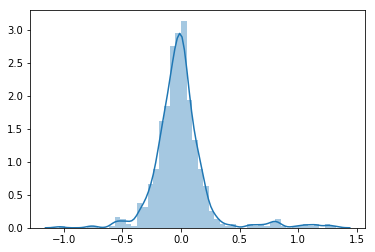

In [145]:
from sklearn.linear_model import LinearRegression as LR
import seaborn as sns
linreg = LR(fit_intercept=True, n_jobs=1)
linreg.fit(X_train_scaled,y_train)
res = y_train-linreg.predict(X_train_scaled)
sns.distplot(res)

Del gráfico se obtiene una forma de campana, es decir el residuo la mayoría de las veces es un valor cercano a 0, el resto de las veces el residuo no es significantemente grande considerando el rango de valores del output (0 a 100), por lo tanto regresión linear pareciera ser un buen modelo para este caso, es importante mencionar que estos son los datos de entrenamiento por lo que si se obtiene un gran error al probar con valores de test es posible que haya overfit.

> f) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? Compare y comente ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?

In [194]:
from scipy import stats
from sklearn.metrics import f1_score

X_train_scaled[0]
weights = np.mean(X_train_scaled,axis=0)
predicted = linreg.predict(X_train_scaled)
zscores = stats.zscore(X_train_scaled,axis = 1)
#fscore = f1_score(y_train, predicted)
fscore = linreg.score(X_train_scaled, y_train)
zscores = np.mean(zscores,axis=0)
print("Pesos:",weights)
print("Z-scores:",zscores)
print("F-score:",fscore)

Pesos: [-1.20058232e-07 -2.25997223e-06  4.93359380e-07 -1.55132932e-06
  6.04446484e-07  4.12742054e-08  4.15864491e-07  6.66642634e-08
  1.09370501e-06 -2.09066638e-05  0.00000000e+00  3.47306525e-07
  4.08832479e-09  0.00000000e+00  3.91853625e-08 -4.93168102e-08
  2.36363249e-08  0.00000000e+00  1.18874183e-07  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.36586658e-07 -9.72485097e-08
  0.00000000e+00  1.33328527e-07  7.01940763e-08  1.57277622e-08
  0.00000000e+00  2.15943970e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.72759641e-07
 -1.99277892e-08  3.44983107e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.59064868e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.06430484e-07
 -1.01716623e-07  0.00000000e+00 -1.97401292e-07  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.02498539e-07  0.00000000e+00 -5.39524780e-09  0.00000000e+00
  0.00000000e+00 -

> g) Calcule la información mútua de los distintos predictores (variables) con respecto a la variable *output* o *target*. Comente con lo calculado anteriormente y se le parece razonable.
```python
from sklearn.feature_selection import mutual_info_regression
minfo_predictor = mutual_info_regression(X,y)
```

In [195]:
#g)
from sklearn.feature_selection import mutual_info_regression
minfo_predictor = mutual_info_regression(X,Y)
minfo_predictor

array([0.88448787, 0.07385084, 0.90094309, 0.31406922, 0.14299381,
       0.27720938, 0.28568103, 0.3415901 , 0.30397548, 0.2383339 ,
       0.10602015, 0.11356666, 0.1340416 , 0.12131263, 0.13677225,
       0.13003303, 0.12693016, 0.09686318, 0.11583078, 0.13662297,
       0.12042062, 0.14782445, 0.11550871, 0.12218926, 0.11203429,
       0.10849568, 0.10978125, 0.12163207, 0.1062923 , 0.11223611,
       0.11803585, 0.10729605, 0.12242616, 0.10884808, 0.10709553,
       0.13612821, 0.12629283, 0.13147774, 0.10894846, 0.11490632,
       0.1164701 , 0.12808724, 0.14345407, 0.15813731, 0.13933857,
       0.11176425, 0.09551845, 0.15061314, 0.1358779 , 0.12868441,
       0.11201451, 0.14526121, 0.15594296, 0.11101666, 0.13695998,
       0.1428817 , 0.14597972, 0.10877118, 0.10511349, 0.11993242,
       0.09806541, 0.12404653, 0.12653629, 0.11635067, 0.14248119,
       0.1378463 , 0.10569176, 0.13152143, 0.14602358, 0.13535562,
       0.11538929, 0.10847372, 0.12794342, 0.1108236 , 0.10555

La función mutual_info_regresion muestra la dependencia entre variables(atributos), es decir, dice que variables afectan más al output Y, al ver lo obtenido se tiene que las columnas teaching, international, research son las más influyentes en la predicción, ademas se tiene que el output no pareciera ser muy dependiente de los países, dado que ninguno sobrepasa los 0.2.

> h)  Construya una función que implemente *Forward Step-wise Selection* (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo. Ordene el eje $x$ de menor a mayor.
```python
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
fss(X_train_scaled,y_train,names_regressors)
```

El criterio utilizado en el ejemplo para la selección de la variable es el MSE (mean scuared error), es decir, se selecciona la variable (atributo) que dé el menor MSE posible, se podrían usar otras funciones de pérdida como MAE (mean absolute loss), esta se parece a MSE, pero en vez de obtener el cuadrado de la diferencia, obtiene el valor absoluto, esta función de pérdida sirve en el caso de que la data tenga outliers, lo que no pareciera muy probable en el dataset que se tiene debido a que los datos parecen siempre tomar valores entre 0 y 100, excepto tal vez en algun ratio. La modificación esta en el codigo siguiente:

In [148]:
def fss(x, y, names_x, k = 10000, mae = 0):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            if(mae): # Usar mae en vez de mse si el flag mae = 1
                mae_candidate = np.mean(abs(residuals_train)) 
                score_candidates.append((mae_candidate, candidate)) 
            else:
                mse_candidate = np.mean(np.power(residuals_train, 2))
                score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        #print ("selected = %s ..."%names_x[best_candidate])
        #print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
#seleccionMse = fss(X_train_scaled,y_train,names_regressors)
#seleccionMae = fss(X_train_scaled,y_train,names_regressors, mae = 1)
#print(seleccionMse==seleccionMae)
print(fss(X_train_scaled,y_train,names_regressors))
#names_regressors

[78, 0, 3, 2, 1, 4, 23, 9, 76, 5, 66, 26, 7, 48, 71, 18, 37, 36, 14, 47, 65, 69, 27, 42, 67, 8, 11, 58, 29, 15, 61, 35, 12, 50, 22, 6, 56, 16, 25, 64, 75, 77, 19, 10, 13, 20, 21, 17, 24, 28, 68, 31, 32, 30, 33, 38, 39, 44, 34, 40, 41, 54, 43, 45, 51, 52, 46, 55, 49, 53, 59, 57, 60, 62, 72, 70, 73, 63, 74]


Los criterios obtienen diferente orden de mejores candidatos, para la generación de gráficos se utilizará el criterio MSE:

In [149]:
def fss_train(x, y,names_x, k = 10000):
    train_errors = list()
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        train_errors.append(best_new_score)
        #print ("selected = %s ..."%names_x[best_candidate])
        #print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return train_errors

def fss_test(x, y, x_t, y_t,names_x, k = 10000):
    test_errors = list()
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            x_test = x_t[:,indexes]
            predictions_test = model.fit(x_train, y).predict(x_test)
            residuals_test = predictions_test - y_t
            mse_candidate = np.mean(np.power(residuals_test, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        test_errors.append(best_new_score)
        #print ("selected = %s ..."%names_x[best_candidate])
        #print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return test_errors

train_errors = fss_train(X_train_scaled,y_train,names_regressors)
test_errors = fss_test(X_train_scaled,y_train,X_test_scaled,y_test,names_regressors)

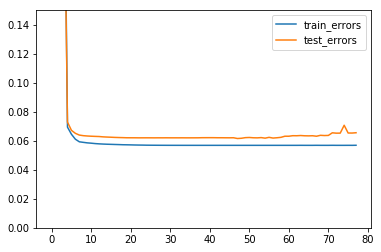

In [150]:
#grafico
import matplotlib.pyplot as plt
plt.plot(train_errors,label = "train_errors")
plt.plot(test_errors, label = "test_errors")
plt.ylim(0,0.15)
plt.legend()
plt.show()

Al ver ambos errores lo primero que se deduce es que, como se vió en el punto g), hay algunas variables con mucho mayor impacto con respecto a otras, por lo tanto al agregar 5 variables el MSE disminuye casi a su mínimo posible, probablemente las variables de países son las que menos aportan al aprendizaje del learner. Ahora al comparar el error de entrenamiento con el error de test, se tiene que estos no difieren en gran medida, por lo que no se asume overfit o si lo hay no es en gran medida.

> i) Ajuste un modelo lineal utilizando “*Ridge Regression*”, es decir, regularizando con la norma $l_2$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^0, 10^6$], variando si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Deje un gráfico sólo para analizar los coeficientes de los países. Describa lo que observa.
```python
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend()
plt.show()
...#modify
if "country" in label:
    plt.plot(alphas_, y_arr, label=label)
plt.title('Regularization Path RIDGE of country coefs')
```

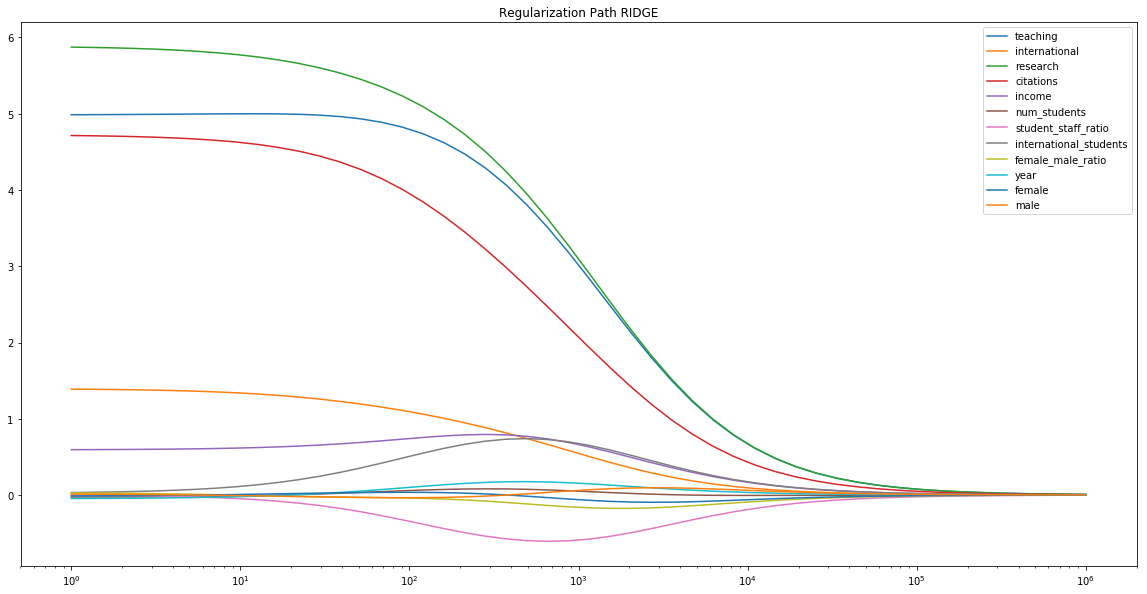

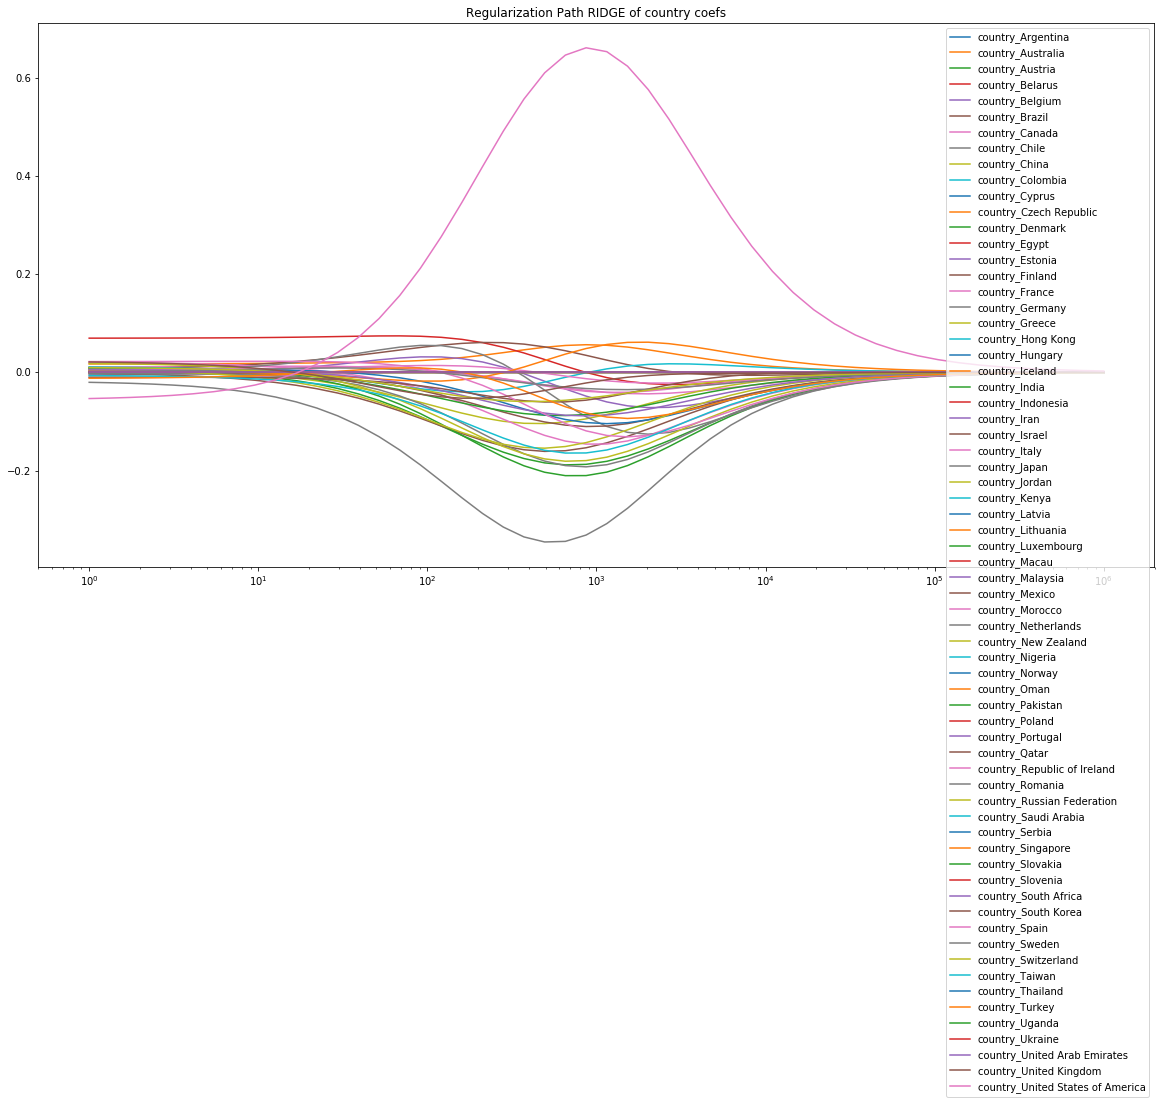

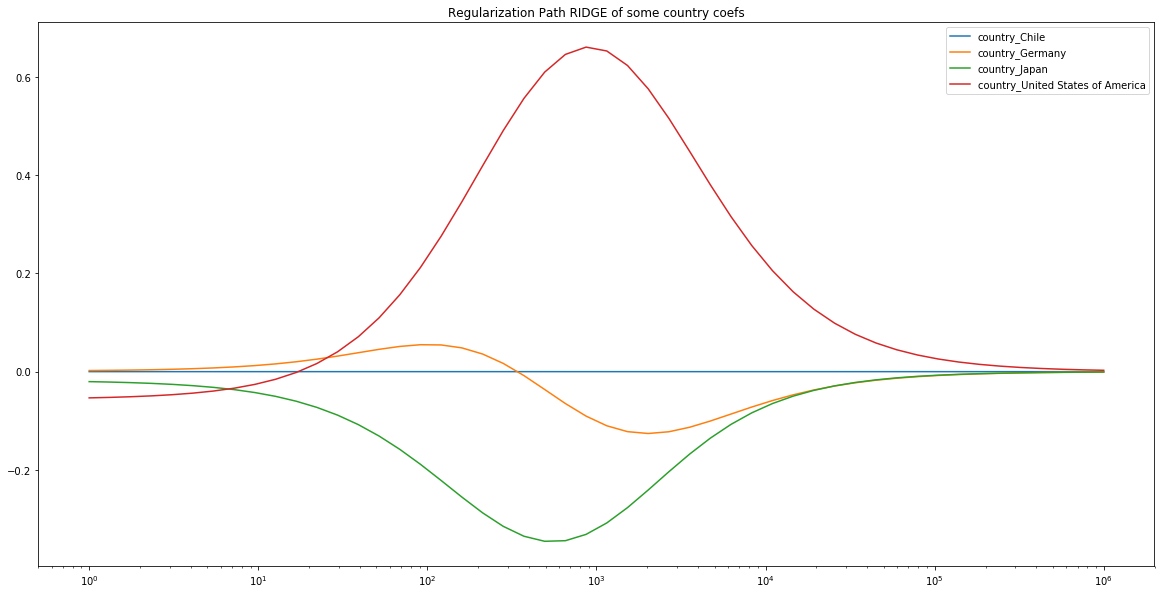

In [151]:
from sklearn.linear_model import Ridge
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
plt.figure(figsize=(20,10))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend()
plt.show()

#todos los paises
plt.figure(figsize=(20,10))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization Path RIDGE of country coefs')
plt.legend()
plt.show()

#paises especificos
plt.figure(figsize=(20,10))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "United States" in label:
        plt.plot(alphas_, y_arr, label=label)
    if "Japan" in label:
        plt.plot(alphas_, y_arr, label=label)
    if "Germany" in label:
        plt.plot(alphas_, y_arr, label=label)
    if "Chile" in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization Path RIDGE of some country coefs')
plt.legend()
plt.show()

De los gráficos se obtiene que el valor de $\lambda$ afecta notablemente a algunos coeficientes, a los coeficientes más grandes los minimiza mientras que a los más pequeños puede aumentarlos o disminuirlos, incluso puede volverlos negativos. También hay que destacar que cuando $\lambda$ toma valores muy altos, todos los coeficientes se vuelven 0, lo que tiene sentido dado que para minimizar el error, la única forma terminará siendo hacer que los coeficientes valgan 0. Sobre los parámetros mas relevantes (los que no son países) se tiene nuevamente lo esperado, los coeficientes de algunos son mucho mas áltos, y estos son afectados en mayor medida por el parámetro regularizador; en cuanto a los países, se tiene que para pequeños valores de $\lambda$, ninguno de estos tiene un coeficiente muy alto, pero cuando $\lambda$ se acerca a 1000, se puede ver que Estados Unidos tiene el mayor coefciente mientras que Japon se vuelve un coeficiente menor a 0 (a pesar del aumento o disminución no llegan a salir del rango [-1,1]), además se tiene que algunos países no aportan al modelo debido a que siempre valen 0 sin importar el valor de $\lambda$ (Chile por ejemplo), esto tal vez se debe a que esos países estaban clasificados en un rango en el ranking (en vez de un valor exacto) dado que se desconocía su total score, por lo tanto despues del preprocesamiento se descartaron esos registros y por ende en el set de entrenamiento no había ninguna universidad de esos países.

> j) Ajuste un modelo lineal utilizando el método “*Lasso*”, es decir, regularizando con la norma $l_1$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^{-2},10^3$]. Para obtener el código, modifique el ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?
```python
from sklearn.linear_model import Lasso
alphas_ = np.logspace(-2,3,base=10)
model = Lasso(fit_intercept=True)
...
country_alphas_ = np.logspace(-5,0,base=10)
```

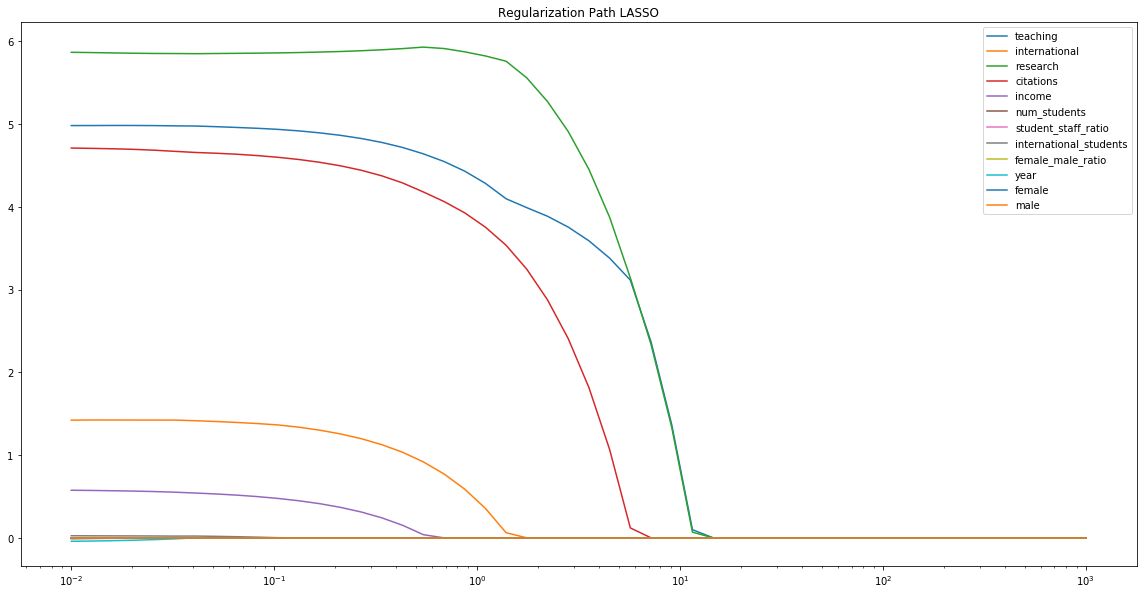

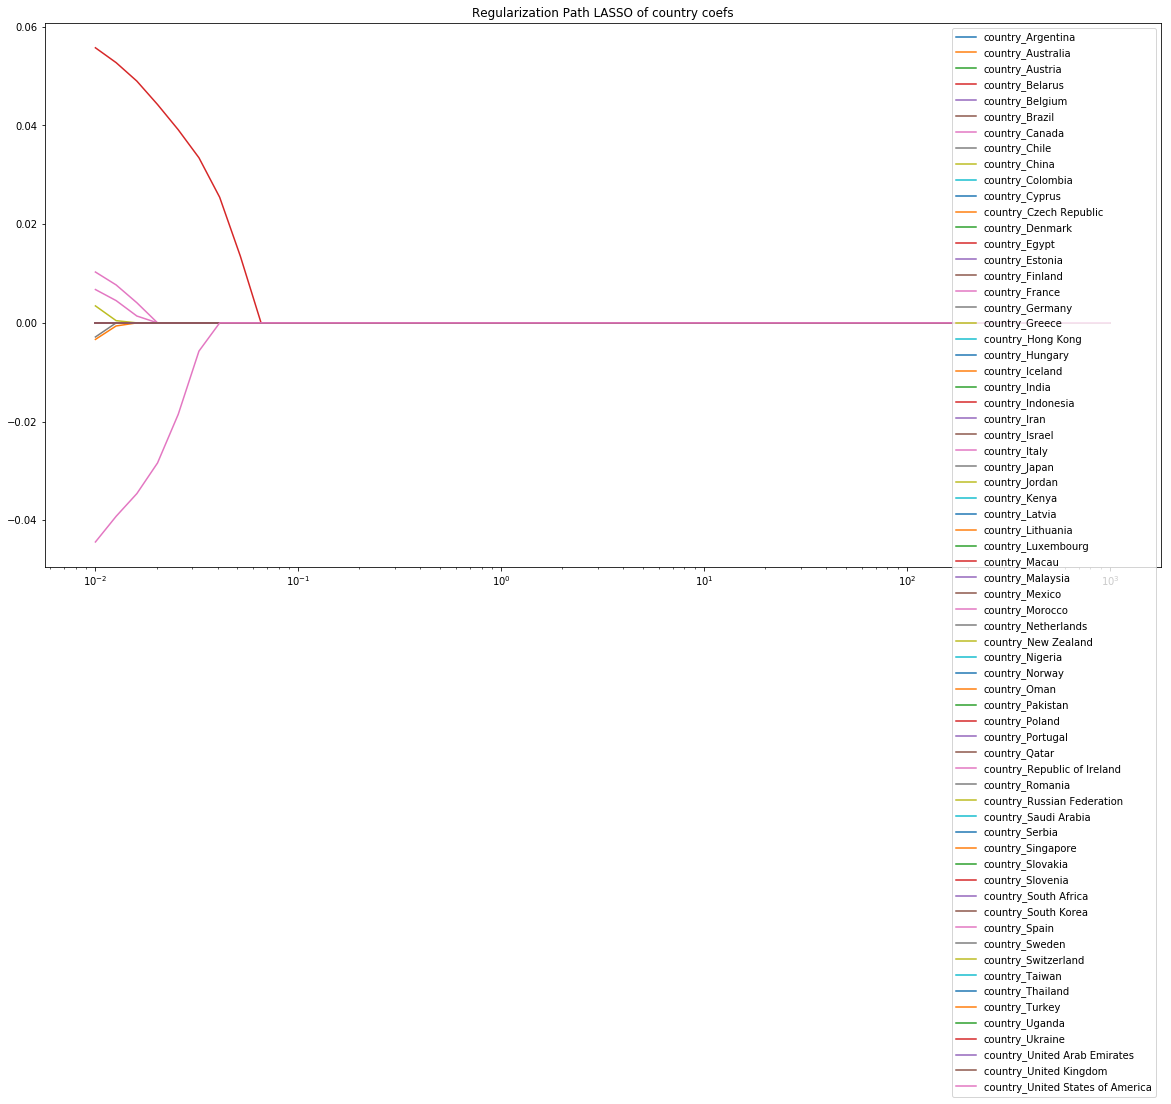

In [152]:
from sklearn.linear_model import Lasso
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(-2,3,base=10)
model = Lasso(fit_intercept=True)
coefs = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
plt.figure(figsize=(20,10))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization Path LASSO')
plt.legend()
plt.show()

#todos los paises
plt.figure(figsize=(20,10))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization Path LASSO of country coefs')
plt.legend()
plt.show()

#country_alphas_ = np.logspace(-5,0,base=10)

De los gráficos pareciera ser que lasso hace que algunos coeficientes de las variables se vuelvan 0 antes que otras (no como en ridge que todos los coeficientes se anulan al mismo tiempo), por lo tanto el método lasso es capaz de disminuir la complejidad de la entrada al ignorar algunos atributos, mientras que ridge solo cambia el impacto que tiene cada atributo en el aprendizaje del learner, por lo tanto lasso es mejor para seleccionar atributos.

> k) Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un gráfico que muestre el error de entrenamiento y el de pruebas como función del parámetro de regularización. Discuta lo que  observa.
```python
alphas_ = #choose it
coefs = []
model = #choose it
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    yhat_train = model.predict(X_train_scaled)
    yhat_test = model.predict(X_test_scaled)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge/lasso')
ax.plot(alphas_,mse_test,label='test error ridge/lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()
```

Se utilizará el método lasso debido a que muchos atributos de país parecieran ser no relevantes en el aprendizaje del learner, lasso podrá seleccionar los atributos correspondientes mientras que ridge no:

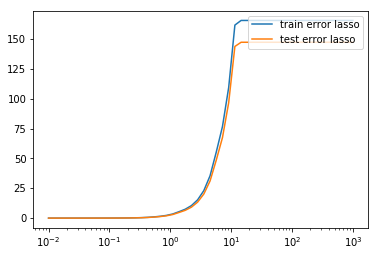

In [153]:
alphas_ = np.logspace(-2,3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    yhat_train = model.predict(X_train_scaled)
    yhat_test = model.predict(X_test_scaled)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=1)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Del gráfico obtenido, por ejempo, se podría escoger un $\lambda = 10^{-1}$ y se nulificarían los coeficientes de los países manteniendo un bajo error de test y entrenamiento.  

> l) Estime el valor del parámetro de regularización en **alguno** de los modelos anteriores haciendo uso de la técnica validación cruzada con un número de folds igual a $K= 5$ y $K = 10$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Mida el error real del modelo (ésto es sobre el conjunto de pruebas). Debido a la escala del error puede utilizar auxiliarmente *MAE* como métrica de desempeño. Compare y concluya.
```python
yhat_test = linreg.predict(X_test_scaled)
mse_test = np.mean(np.power(yhat_test - y_test, 2))
from sklearn.model_selection import KFold
K=10
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(X_train_scaled):
    linreg = LR(fit_intercept=True, n_jobs=1)
    linreg.fit(X_train_scaled[train], y_train[train])
    yhat_kfold_val = linreg.predict(X_train_scaled[val])
    mse_fold = np.mean(np.power(yhat_kfold_val - y_train[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / K
...#or MAE
mae_fold = np.mean(np.abs(yhat_kfold_val - y_train[val]))
```

El modelo a utilizar será lasso:

In [154]:
def cross_val(K):
    yhat_test = linreg.predict(X_test_scaled)
    mse_test = np.mean(np.power(yhat_test - y_test, 2))
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=K)
    mse_cv = 0
    mae_cv = 0
    alphas_errors = []
    alphas = np.logspace(-2,3,base=10)
    for a in alphas:
        lasso = Lasso(fit_intercept=True)
        lasso.set_params(alpha=a)
        for train, val in kf.split(X_train_scaled):
            lasso.fit(X_train_scaled[train], y_train[train])
            yhat_kfold_val = lasso.predict(X_train_scaled[val])
            mse_fold = np.mean(np.power(yhat_kfold_val - y_train[val], 2))
            mae_fold = np.mean(np.abs(yhat_kfold_val - y_train[val]))
            mse_cv += mse_fold
            mae_cv += mae_fold
        mse_cv = mse_cv / K
        mae_cv = mae_cv /K
        lista = [a,mse_cv,mae_cv]
        alphas_errors.append(lista)
    return np.array(alphas_errors)

sensibilidad = 0.2
alphas_errors_K5 = cross_val(5)
alphas_errors_K10 = cross_val(10)
print("(K = 5) Alphas aceptables en base a mse:")
print(alphas_errors_K5[alphas_errors_K5[:,1] <= sensibilidad])
print("(K = 5) Alphas aceptables en base a mae:")
print(alphas_errors_K5[alphas_errors_K5[:,2] <= sensibilidad])
print("(K = 10) Alphas aceptables en base a mse:")
print(alphas_errors_K10[alphas_errors_K10[:,1] <= sensibilidad])
print("(K = 10) Alphas aceptables en base a mae:")
print(alphas_errors_K10[alphas_errors_K10[:,2] <= sensibilidad])

(K = 5) Alphas aceptables en base a mse:
[[0.01       0.0689721  0.15156257]
 [0.01264855 0.08254247 0.18152503]
 [0.01599859 0.08539632 0.18787399]
 [0.0202359  0.08668541 0.19089357]
 [0.02559548 0.08826404 0.19476089]
 [0.03237458 0.09089196 0.20060286]
 [0.04094915 0.09486683 0.20956291]
 [0.05179475 0.09930504 0.2214654 ]
 [0.06551286 0.10603592 0.2376554 ]
 [0.08286428 0.11672372 0.25977012]
 [0.10481131 0.13353601 0.28860558]
 [0.13257114 0.16033025 0.32712408]]
(K = 5) Alphas aceptables en base a mae:
[[0.01       0.0689721  0.15156257]
 [0.01264855 0.08254247 0.18152503]
 [0.01599859 0.08539632 0.18787399]
 [0.0202359  0.08668541 0.19089357]
 [0.02559548 0.08826404 0.19476089]]
(K = 10) Alphas aceptables en base a mse:
[[0.01       0.06798667 0.15071178]
 [0.01264855 0.07467334 0.16556469]
 [0.01599859 0.07567747 0.16770021]
 [0.0202359  0.0767972  0.17015093]
 [0.02559548 0.07852681 0.17416352]
 [0.03237458 0.08123337 0.18002585]
 [0.04094915 0.08470633 0.18807763]
 [0.051794

Para estimar $\lambda$, se utilizó un parámetro de sensibilidad del error para ver que $\lambda$s podrían ser aceptables. Un cross validation de K=5 entrega errores mas grandes que K=10, para el caso de lasso, el error mae aumenta en mayor medida cuando $\lambda$ incrementa en comparación a mse. 

> m) Con el modelo que se piense que es el mejor, en base a todo lo experimentado. Realice el *ranking* de las universidades del que no se tienen etiquetas (*unlabeled data* o *target data*) a través de predecir los datos que se dejaron como *pruebas* y ordenar su score en el *dataframe*.
```python
df_test["total_score"] = model.predict(X_test_scaled) #predict score
...#armar un raking
univ_chilenas = df_test[df_test["country_Chile"]==1]
rannking_univ_ch = univ_chilenas.sort_values(by="total_score",ascending=False)
ranking = 1
for index,row in rannking_univ_ch.iterrows():
    print("%d - Institucion: %s" %(ranking,row["university_name"]))
    ranking+=1
```

El modelo que se pareciera ser el mejor en este caso es lasso ($\lambda$ = 0.1) debido a que nulifica el impacto de algunos atributos de países en el learner, lo que finalmente lleva a reducir el overfit. 

In [156]:
X_test_2 = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
X_test_2 = X_test_2.astype('float32')
scaler.fit(X_test_2)
X_test_2_scaled = scaler.transform(X_test_2)

model = Lasso()
model.set_params(alpha=0.1)
model.fit(X_train_scaled,y_train)
df_test['total_score'] = model.predict(X_test_2_scaled) #predict score
univ_chilenas = df_test[df_test["country_Chile"]==1]
rannking_univ_ch = univ_chilenas.sort_values(by="total_score",ascending=False)
ranking = 1
print("Ranking universidades Chilenas:")
for index,row in rannking_univ_ch.iterrows():
    print("%d - Institucion: %s" %(ranking,row["university_name"]))
    ranking+=1
    

#ranking global
print("\nRanking mundial")
universidades = df_test.sort_values('total_score',ascending = False)
i = 1
for nombre in universidades['university_name']:
    print("%d - Institucion: %s" %(i,nombre))
    i += 1


Ranking universidades Chilenas:
1 - Institucion: Federico Santa María Technical University
2 - Institucion: Federico Santa María Technical University
3 - Institucion: University of Santiago, Chile (USACH)
4 - Institucion: Austral University of Chile
5 - Institucion: Pontifical Catholic University of Valparaíso

Ranking mundial
1 - Institucion: University of São Paulo
2 - Institucion: Lomonosov Moscow State University
3 - Institucion: University of São Paulo
4 - Institucion: Middle East Technical University
5 - Institucion: Sungkyunkwan University (SKKU)
6 - Institucion: Tokyo Institute of Technology
7 - Institucion: University of Stuttgart
8 - Institucion: Tilburg University
9 - Institucion: University of São Paulo
10 - Institucion: Tohoku University
11 - Institucion: State University of Campinas
12 - Institucion: Osaka University
13 - Institucion: Tilburg University
14 - Institucion: National Tsing Hua University
15 - Institucion: Zhejiang University
16 - Institucion: Fudan University

Se asume que la Universidad Santa María de ese ranking es la de Valparaiso.

# Pregunta 2:

In [ ]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

> a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

>A continuación se describe el dataframe en a partir de su dimensión y la cabecera de los datos, las 4 columnas son "dataset" en este caso tiene el valor "a" para todos, "fname" el nombre del archivo de audio, "label" correspondiente a las clases del audio, y "sublabel" que para el dataset b contiene información sobre el tipo de ruido ambiente como ruido normal o con murmullos.

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df['label'].value_counts()

>b) Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la importancia de realizar este paso.

In [ ]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})

new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

> En primer lugar se aplica la función "clean_filename" que transforma los nombres de los archivos, dejándolos con los mismos nombres que los audios del set a, a continucación se cargan localmente con load_wav_file en la columna 'time_series', a la cúal posteriormente le aplicamos un padding de ceros utilizando el largo máximo de todos los audios.

> El padding permite que todos los vectores que representan los audios tengan los mismos largo, como algunos son más cortos se añaden ceros, lo que un learner interpretará como que no hay información relevante. 

In [ ]:
new_df['time_series'].head()

In [ ]:
max(new_df['len_series'])

> c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [[4]](#refs), el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase. Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos? ¿Un solo dato puede afectar esto?

In [ ]:
file_info = pd.read_csv('./heartbeat-sounds/set_a.csv')
new_info = pd.DataFrame({'file_name' : file_info['fname'].apply(clean_filename, string='Aunlabelledtest'),
                         'target' : file_info['label'].fillna('unclassified')})   
new_info['time_series'] = new_info['file_name'].apply(load_wav_file, path='heartbeat-sounds/set_a/')    
new_info['len_series'] = new_info['time_series'].apply(len)  

In [ ]:
new_info['target'].value_counts()

> Utilizando el criterio del doctor se generan nuevas clasificaciones para los datos, originalmente se agrega la clasificación "unclassified" para filas  con NA, lo que muestra que no estabamos considerando a la clase mayoritaria, a continuación el experto traduce el dataset a 3 clasificaciones normal/extrahls = 2, artifact = 0, murmur = 1, y considera que algunas de las clasificacion es extrahls pueden catalogadas dentro de la normalidad y se producen errores por la forma que se grabaron los sonidos.

In [ ]:
new_labels = np.zeros((176,), dtype="int")
new_labels[:40] = 0
new_labels[18] = 0
new_labels[23] = 0
new_labels[40:59] = 1
for x in [40, 55]:
    new_labels[x] = 2
new_labels[59:93] = 2
for x in [62,63,65,68]:
    new_labels[x] = 1
new_labels[93:124] = 1
for x in [101, 107, 115, 116, 122]:
    new_labels[x] = 2
new_labels[124:]= [0,2,2,1,
                   1,1,1,1,
                   0,1,0,1,
                   1,1,2,1,
                   0,1,1,1,
                   1,1,2,0,
                   0,0,0,0,
                   0,0,1,0,
                   0,0,0,0,
                   0,1,0,2,
                   1,2,2,2,
                   2,2,2,2,
                   2,2,2,2]

In [ ]:
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
new_df['target'].value_counts()

> Al existir etiquetas mal asignadas, la máquina que use esta información para su entrenamiento tenderá a clasificar erroneamente nuevas entradas con características similares, de hecho tan solo una etiqueta mal clasificada podría mover la "frontera" entre 2 clases distintas, generando una clasificación erronea para entradas nuevas.

> d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos clasificadores.

> Se codifican de la siguiente forma:  normal/extrahls = 2, artifact = 0, murmur = 1

In [ ]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
new_df['target'].value_counts()

> e) Desordene los datos, evitando ası́ el orden en el que vienen la gran mayorı́a de las etiquetas. Cree la matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas? ¿De qué tipo?

In [ ]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

> Con respecto al número de dimensiones se observá que son demasiadas, este número esta restringido al audio de mayor largo, por lo que la mayoría de los datos contendrán ceros en las dimensiones finales. Esto genera los problemas relacionados con la alta dimensionalidad, pudiendo separar erroneamente 2 elementos que son cercanos y provocando el sobreajuste a los datos de entrenamiento.

> f) Para pre-procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido. Visualice el cambio de representación.

In [ ]:
X_fourier = np.abs(np.fft.fft(X))

In [ ]:
X[0], X_fourier[0], X_fourier.shape

> Se observa que la representació de los vectores ha cambiado, donde cada valor del vector X fue transformado a un valor positivo y de alto orden de magnitud, inclusive los valores ceros se han cambiado por su equivalencia en términos de frecuencia. Tambien observamos que se conserva el número de dimensiones pues la transformada convierte los datos pero no reduce dimensiones.

> g) Para seguir con el pre-procesamiento realice un muestreo representativo de los datos a través de una técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podrı́a determinar si el muestro es representativo?

In [ ]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

> EL realizar un muestreo representativo ayuda a reducir el número de dimensiones considerando solo aquellas dimensiones o características que entregan información sobre el vector, esto resulta muy útil considerando que muchos vectores tienen una gran cantidad de dimensiones en ceros (transformados a frecuenia) y que no aportan información e incluso provocarían problemas relacionados con la maldición de la dimensionalidad.
>
> Para determinar si el muestreo es representativo se podría entrenar un learner con el número de dimensiones originales y obtner una salida Y, luego tomar el vector de dimensiones reducidas, añadirles ceros al final y entregar esta entrada al mismo learner, los resultados deben ser muy similares a los de la salida Y.

> h) Debido a que no hay conjunto de pruebas, y que es necesario para evaluar la calidad final del modelo, genérelo a través de la técnica hold-out

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)

> Esta técnica consiste en una en separar los datos de forma aleatoria para el entrenamiento en este caso particular se separa un cuarto del dataset para esto.

> i) Realice un proceso de estándarizar los datos para ser trabajados adecuadamente. Recuerde que solo se debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

> Esta técnica de estandarización ajusta los datos mediante la eliminación de la media y el escalado en términos de la varianza.

> j) Realice una reducción de dimensionalidad a través de la técnica **PCA**, para representar los datos en $d = 2$ dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.

In [ ]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

In [ ]:
from matplotlib import pyplot as plt
s1=list()
s2=list()
for i in X_pca_train:
    s1.append(i[0])
    s2.append(i[1])    
plt.plot(s1,s2,'o')

In [ ]:
s1=list()
s2=list()
for i in X_pca_test:
    s1.append(i[0])
    s2.append(i[1])    
plt.plot(s1,s2,'o')

Se observa que para ambos dataset los datos encuentran en torno a los valores 0,0, es decir son sonidos que cumplen con la normalidad, sin embargo existen valores extremos que son muy distintos al resto y pueden corresponder a audios viciados o con  contenido equivocado.

> k) Entrene un modelo de Regresión Logı́stica variando el parámetro de regularización $C$ construyendo un gráfico resumen del error en función de este hiper-parámetro. Además entrene un Perceptrón, variando el hiper-parámetro de regularización $\alpha$ en el rango inverso que para la Regresión Logı́stica ¿Por qué? Contruya el mismo gráfico resumen, en función de $C$ o $\alpha$. Compare y comente lo observado.


Entrenamos el regresor logístico con distintos valores de c lo que nos entrega distintos modelos que analizamos el error absoluto medio en base a su predicción.

In [ ]:
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.metrics import mean_absolute_error

Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

predicciones = list()
for c in Cs:
    model = LogisticRegression(penalty='l2', C=c, max_iter=200)
    model = model.fit(X_pca_train, y_train)    
    #predicciones.append( mean_absolute_error(y_test, model.predict(X_pca_test) ) )    
    predicciones.append( model.score(X_pca_test,y_test))

Generamos un gráfico para observar para que valores de c el error es más bajo, se ve  que los valores más bajos del parámetro C genera mejores resultados para el conjunto de prueba.

In [ ]:
colx = ("10e-4","10e-3","10e-2","10e-1","10e0","10e1","10e2","10e3","10e4")
plt.plot(colx, predicciones ,'o')

A continuación se entrena el perceptrón con valores inversos de c y se observan los resultados en un gráfico.

In [ ]:
alphas = [1/c for c in Cs]
predicciones_perc = list()
for a in alphas:
    model = Perceptron(penalty='l2', alpha=a, max_iter=200)
    model = model.fit(X_pca_train, y_train)    
    #predicciones_perc.append( mean_absolute_error(y_test, model.predict(X_pca_test) ) )  
    predicciones_perc.append( model.score(X_pca_test,y_test))

In [ ]:
plt.plot(colx, predicciones_perc ,'o')

Se observa que el regresor y el perceptrón generan mejores resultados (score) cuando aumenta el valor de c y disminuye el valor de alpha (aumenta c). Esto ocurre ya que ambos métodos se basan en un método discriminativo que aproxima log-odds( corresponden al logaritmo de la probabilidad que un valor pertenenzca a una clase) usando funciones lineales.

> l) Genere otra representación de los datos a través de la técnica de reducción de dimensionalidad **ICA**, con dimensionalidad $d = 2$. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un *warning* explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones. Vuelva a realizar el item k) pero para esta nueva representación.

In [ ]:
from sklearn.decomposition import FastICA
ica_model = FastICA(n_components=2)
ica_model.fit(X_train)
X_ica_train = ica_model.transform(X_train)
X_ica_test = ica_model.transform(X_test)

In [ ]:
s1=list()
s2=list()
for i in X_ica_train:
    s1.append(i[0])
    s2.append(i[1])    
plt.plot(s1,s2,'o')

In [ ]:
s1=list()
s2=list()
for i in X_ica_test:
    s1.append(i[0])
    s2.append(i[1])    
plt.plot(s1,s2,'o')

Los resultados de ICA muestran distribución de los puntos en torno al 0,0 en ambos conjuntos, no obstante los resultados estan normalizados, esto no demuestra que la reducción de dimensiones sea mejor en comparación a PCA, pero podría generar mejores resultados al entrenar los modelos.

In [ ]:
predicciones2 = list()
for c in Cs:
    model = LogisticRegression(penalty='l2', C=c, max_iter=200)
    model = model.fit(X_ica_train, y_train)    
   # predicciones2.append( mean_absolute_error(y_test, model.predict(X_ica_test) ) )
    predicciones2.append( model.score(X_ica_test,y_test))

In [ ]:
plt.plot(colx, predicciones2 ,'o')

In [ ]:
predicciones_perc2 = list()
for a in alphas:
    model = Perceptron(penalty='l2', alpha=a, max_iter=200)
    model = model.fit(X_ica_train, y_train)    
    #predicciones_perc2.append( mean_absolute_error(y_test, model.predict(X_ica_test) ) )  
    predicciones_perc2.append( model.score(X_ica_test,y_test))

In [ ]:
plt.plot(colx, predicciones_perc2 ,'o')

Al igual que antes los resultados entre ambos métodos son similares, generan mejores resultados para valores más grandes de c.

> m) Experimente con diferentes dimensiones $d$ para la proyección de PCA e ICA con el propósito de obtener un modelo con menor error. Construya una tabla o gráfico resumen de los errores o *accuracy*, comente.

In [ ]:
def regresor_pca_ica(d, X_train, y_train, X_test, y_test):
    pca_model = PCA(n_components=d)
    pca_model.fit(X_train)
    X_pca_train = pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)

    ica_model = FastICA(n_components=d)
    ica_model.fit(X_train)
    X_ica_train = ica_model.transform(X_train)
    X_ica_test = ica_model.transform(X_test)
    
    Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
    predlogic = list()
    for c in Cs:
        model = LogisticRegression(penalty='l2', C=c, max_iter=200)
        model = model.fit(X_pca_train, y_train)    
        predlogic.append( model.score(X_pca_test,y_test))
    max1 = max(predlogic)
    
    predlogic = list()
    for c in Cs:
        model = LogisticRegression(penalty='l2', C=c, max_iter=200)
        model = model.fit(X_ica_train, y_train)    
        predlogic.append( model.score(X_ica_test,y_test))
    max2 = max(predlogic)
    
    return (max1,max2)

def perceptron_pca_ica(d, X_train, y_train, X_test, y_test):
    pca_model = PCA(n_components=d)
    pca_model.fit(X_train)
    X_pca_train = pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)

    ica_model = FastICA(n_components=d)
    ica_model.fit(X_train)
    X_ica_train = ica_model.transform(X_train)
    X_ica_test = ica_model.transform(X_test)
    
    Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
    alphas = [1/c for c in Cs]
    predlogic = list()
    for a in alphas:
        model = Perceptron(penalty='l2', alpha=a, max_iter=200)        
        model = model.fit(X_pca_train, y_train)    
        predlogic.append( model.score(X_pca_test,y_test))
    max1 = max(predlogic)
    
    predlogic = list()
    for a in alphas:
        model = Perceptron(penalty='l2', alpha=a, max_iter=200)
        model = model.fit(X_ica_train, y_train)    
        predlogic.append( model.score(X_ica_test,y_test))
    max2 = max(predlogic)
    
    return (max1,max2)

In [ ]:
l1 = list()
for i in range(9):
    l1.append(regresor_pca_ica(i+2, X_train, y_train, X_test, y_test))

In [ ]:
l2 = list()
for i in range(9):
    l2.append(perceptron_pca_ica(i+2, X_train, y_train, X_test, y_test))

Se generan 2 tablas correspondientes al regresor logistico y perceptrón considerando hasta 10 dimensiones donde los valores para las columnas pca e ica corresponde al máximo valor obtenido en accuracy para algún valor de c y alpha.

In [ ]:
tabla1 = pd.DataFrame()
tabla1['Dimensiones'] = (2,3,4,5,6,7,8,9,10)
l1pca = list()
l1ica = list()
for i in l1:
    l1pca.append(i[0])
    l1ica.append(i[1])
tabla1['PCA'] = l1pca
tabla1['ICA'] = l1ica
tabla1

In [ ]:
tabla2 = pd.DataFrame()
tabla2['Dimensiones'] = (2,3,4,5,6,7,8,9,10)
l1pca = list()
l1ica = list()
for i in l2:
    l1pca.append(i[0])
    l1ica.append(i[1])
tabla2['PCA'] = l1pca
tabla2['ICA'] = l1ica
tabla2

Se observa que los valores para el regresor logístico son mejores que para el perceptrón, tanto para PCA como para ICA, tambien se observa que la presición aumenta al aumentar el número de dimensiones.

> n) Realice otra reducción de dimensionalidad ahora a través de la técnica **LDA**, para representar los datos en $d = 2$ dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un *warning* explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_model = LDA(n_components=2)
lda_model.fit(X_train,y_train)
X_lda_train = lda_model.transform(X_train)
X_lda_test = lda_model.transform(X_test)
s1=list()
s2=list()
for i in X_lda_train:
    s1.append(i[0])
    s2.append(i[1])    
plt.plot(s1,s2,'o')

In [ ]:
s1=list()
s2=list()
for i in X_lda_test:
    s1.append(i[0])
    s2.append(i[1])    
plt.plot(s1,s2,'o')

> o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item k) en el nuevo espacio generado por la representación según las $d$ dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique.


In [ ]:
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

predicciones = list()
for c in Cs:
    model = LogisticRegression(penalty='l2', C=c, max_iter=200)
    model = model.fit(X_lda_train, y_train)        
    predicciones.append( model.score(X_lda_test,y_test))
plt.plot(colx, predicciones ,'o')

In [ ]:
predicciones_perc2 = list()
for a in alphas:
    model = Perceptron(penalty='l2', alpha=a, max_iter=200)
    model = model.fit(X_lda_train, y_train)        
    predicciones_perc2.append( model.score(X_lda_test,y_test))
plt.plot(colx, predicciones_perc2 ,'o')    

LDA entrega mucho mejores resultados en presición  tan solo para 2 dimensiones a medida que el valor de c es más pequeño y alpha aumenta, por lo que se estima que en caso de aumentar el número de dimensiones de LDA, mejorara la accurancy.

> p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterı́sticas (*feature crafting*) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [[6]](#refs), [[7]](#refs)  si desea.

In [ ]:
X_fourier.shape

In [ ]:
def max_REGRESOR_PCA(X_fourier):    
    maximo =0
    for a in range(int(39690/2400)):
        a=a+1
        X_resampled = []
        for i in range(X_fourier.shape[0]):
            sequence = X_fourier[i,:].copy()
            resampled_sequence = signal.resample(sequence, a*2400)
            X_resampled.append(resampled_sequence)
        
        X_resampled = np.array(X_resampled)        
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.20, random_state=42)
        std = StandardScaler(with_mean=True, with_std=True)
        std.fit(X_train)
        X_train = std.transform(X_train)
        X_test = std.transform(X_test)
        
        for i in range(20):        
            d = i+10
            pca_model = PCA(n_components=d)
            pca_model.fit(X_train, y_train)
            X_pca_train = pca_model.transform(X_train)
            X_pca_test = pca_model.transform(X_test)        

            Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
            predlogic = list()
            for c in Cs:
                model = LogisticRegression(penalty='l2', C=c, max_iter=100)
                model = model.fit(X_pca_train, y_train)    
                predlogic.append( model.score(X_pca_test,y_test))        

            max_local = max(predlogic)
            
            if max_local > maximo:             
                maximo = max_local
                print((a*2400),maximo, d)
                dimensiones = d
    
    return (maximo,d)

In [ ]:
max_REGRESOR_PCA(X_fourier)

Para la entrada se ulizo tanto la transformada de furier como la estandarización de los vectores, lo generá mejores resultados que al no aplicarlos, por lo  que para mejorar resultados se probó iterando distintas dimensionalidades para la función signal que transforma las características reduciendo dimensiones antes del entrenamiento, se probarón distintas combinaciónes de modelos y de reductores de dimensiones (PCA,ICA, LDA) y la combianción que generó los mejores resultados fue la reducción dimensiones inicial previa al modelo con 2400 características, a continuación se utilizó un reductor de dimensiones PCA y un regresor logístico, lo que entregó un máximo local de 0.8611 superior a los valores encontrados con anterioridad. 

# Pregunta 3:

> a) Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros por clase y describa el dataset.
```python
import pandas as pd
df = pd.read_csv('./emotionanalysis/text_emotion.csv')
```

Dimensiones de la matriz de datos de entrada: (40000, 4)

Columnas: Index(['tweet_id', 'sentiment', 'author', 'content'], dtype='object')

Posibles sentimientos:
 neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64


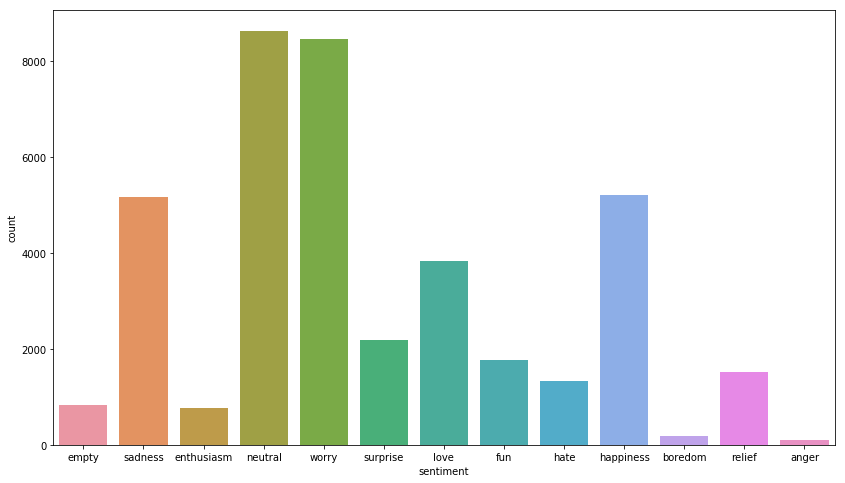

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./text_emotion.csv')
print("Dimensiones de la matriz de datos de entrada:",df.shape)
print("\nColumnas:",df.columns)
print("\nPosibles sentimientos:\n",df['sentiment'].value_counts())
plt.figure(figsize=(14,8))
sns.countplot(x= "sentiment",data=df)
plt.show()

In [87]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


Se tiene un dataset de 40000 registros, con los siguientes atributos:

- tweet_id: identificador del comentario.  
- sentiment: emoción asociada al comentario, este el target.  
- author: autor del comentario.  
- content: el comentario.  

Existen 13 clases posibles para la clasificación de sentimientos:  neutral, worry, happiness, sadness, love, surprise, fun, relief, hate, empty, enthusiasm, boredom, anger. Notar que sentimientos como empty y neutral podrían considerarse de la misma categoría.

El problema no es balanceado, hay una gran cantidad de emociones con respecto a otras.

Sobre las columnas hay que notar que tweet_id y author no generan patrones reconocibles por lo que al learner no le servirán estos atributos (author tal vez si le sirva al learner, pero queremos que el análisis de sentimientos solo este basado en el comentario, no en la persona que lo escribio).

In [88]:
df = df.drop(["tweet_id","author"],axis = 1)
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


> b) Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para verificar los resultados de los algoritmos. Genere un conjunto de validación si estima conveniente.
```python
import numpy as np
np.seed(70)
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
```

Dado que hay una gran cantidad de instancias (40000) se creará un set de validación, este será equivalente al 20% de los datos de entrenamiento:

In [89]:
import numpy as np

dic_sentimientos = {
    "worry":1,
    "happiness":2,
    "sadness":3,
    "love":4,
    "surprise":5,
    "fun":6,
    "neutral":7,
    "relief":8,
    "hate":9,
    "empty":10,
    "enthusiasm":11,
    "boredom":12,
    "anger":13
}

df['sentiment'] = df['sentiment'].map(dic_sentimientos)
np.random.seed(70)
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
mskv = np.random.rand(len(df_train)) < 0.8
df_train_final = df_train[mskv]
df_val = df_train[~mskv]

print(df.shape)
print(df_train_final.shape)
print(df_val.shape)
print(df_test.shape)

(40000, 2)
(25609, 2)
(6381, 2)
(8010, 2)


Entonces el dataset de entrenamiento sera de 25609 instancias, el de validación de 6381 instancias y el de test tendrá 8010 instancias.

> c) Construya las representaciones de los datos con los que trabajará, ya sea para las entradas de los modelos como para las salidas. Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros. 

La clase sentiment fue transformada a enteros en base al siguiente diccionario:  
worry = 1  
happiness = 2  
sadness = 3  
love = 4  
surprise = 5  
fun = 6  
neutral = 7  
relief = 8  
hate = 9  
empty = 10  
enthusiasm = 11  
boredom = 12  
anger = 13  

In [90]:
df_train_final.head()

,sentiment,content
2,3,Funeral ceremony...gloomy friday...
4,7,@dannycastillo We want to trade with someone w...
5,1,Re-pinging @ghostridah14: why didn't you go to...
7,1,Hmmm. http://www.djhero.com/ is down
10,7,cant fall asleep


Ahora hay que realizar un preprocesamiento a los comentarios, lo primero que hay que hacer es elminar los @nombre presentes en algunos comentarios, estos solo indican que el comentario es una respuesta a otro o estan nombrando a otro usuario, por lo que no son de utilidad, para esto se eliminarán las palabras que tengan un @, el problema es que esto puede causar que se pierdan algunas palabras que usen @.

Al analizar el excel con los comentarios, se puede ver que hay 3 comentarios que tienen el formato: "Re-pinging @usuariox [comentario usuariox] [cometario del usuario real]", para estos casos específicos hay dos opciones, quitarlos del dataset o editarlos "a la fuerza", quitando manualmente el comentario que no es de la persona en sí, pero dado que en este caso solo hay 3 instancias, solo se ignorarán.

In [91]:
import re
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def word_extractor1(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

def word_extractor(text):
    wordstemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    text = re.sub(r'(?=@).+?(?=\s)','',text)#elimina las palabras que empiecen con @, esto para eliminar los usuarios dentro de un comentario.
    word_tokens = word_tokenize(text)
    wordtokens = [wordstemmer.stem(word.lower())for word in word_tokenize(text)]
    words = ""
    for word in word_tokens:
        if word not in commonwords:
            words += " "+word
    return words


texts_train = [word_extractor(text) for text in df_train_final['content']]
print(len(texts_train))
texts_val = [word_extractor(text) for text in df_val['content']]
print(len(texts_val))
texts_test = [word_extractor(text) for text in df_test['content']]
print(len(texts_test))

25609
6381
8010


Ahora hay que crear una representación vectorizada de los textos para que pueda ser utilizada por el learner:

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)

labels_train = np.asarray(df_train_final["sentiment"].astype(float))
labels_val = np.asarray(df_val["sentiment"].astype(float))
labels_test = np.asarray(df_test["sentiment"].astype(float))

vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
for tag, count in zip(vocab, dist):
    print (count, tag)

17 00
12 000
1 000th
1 00am
2 00pm
2 01
2 02
1 024
1 02mxjj
5 04
6 05
1 05ixbj
5 06
1 0600
1 06am
3 07
1 07am
1 07k6e
1 07k6x
1 07kbp
1 07kbq
1 07xoh
1 07yez
3 08
13 09
1 097dfj
2 0_o
1 0a7v3j
1 0egwanj
1 0f
1 0ghz
1 0gmunj
1 0k
1 0l2tsj
1 0rpm
1 0s
1 0t2b6j
1 0ut
1 0xoxij
122 10
35 100
5 1000
1 10000
1 10000000000
2 100000000000000000000000000000000000
1 1000th
1 1000x
1 100greatestgames
1 100msg
3 100th
3 101
1 1017
2 102
1 103
1 104m6wj
1 105
1 1052x1
1 106
1 107
2 108
1 1095
7 10am
2 10k
1 10m
1 10min
1 10mins
1 10mm
1 10p
6 10pm
7 10th
1 10uemq
1 10yr
49 11
2 110
1 1100
1 1115
1 1123
1 113
1 1130
1 1155hours
1 117th
2 11am
1 11dd2t
3 11pm
2 11th
1 11w
1 11y
1 11z2ip
48 12
2 120
1 120mm
1 121908inlove
3 123
1 128
1 12am
2 12hr
1 12p
1 12pm
1 12r3c3
1 12seconds
5 12th
24 13
1 1300
1 130am
2 131
1 1313
1 1330
1 13341015518
1 134071
1 13576
1 136
1 137cty
1 13f5m0
1 13gigs
1 13nfk1
1 13pdrmj
1 13pqtw
1 13th
26 14
13 140
2 143
1 144
1 145
1 1473318
1 14lvi
1 14lyij
1 14m
1 14mph
41 15


17 adorable
7 adore
1 adoreeeee
2 adoreiii
1 adoring
2 adoro
1 adravan
1 adrenaline
1 adress
1 adresse
2 adriana
1 adrianmw1
3 ads
1 adsense
1 adt
1 adter
1 adtï
5 adult
1 adulthood
1 adults
1 adv
8 advance
3 advanced
5 advantage
1 advantages
8 adventure
2 adventures
1 advert
2 advertise
2 advertisement
2 advertising
2 adverts
13 advice
3 advil
1 adviser
1 advisory
1 adwancrd
1 ady
1 aeneid
1 aerlingus
1 aerobics
1 aerolas
1 aeroplanes
1 aesthetic
2 af8jt
1 afarid
1 afectat
1 aff_id
1 affair
1 affairs
1 affect
1 affecting
1 affection
2 affects
1 affence
1 afficionado
1 affiliate
1 affiliation
20 afford
1 afireinside687
25 afraid
1 afraidiowe
1 afriad
3 africa
3 african
1 afrikaah
1 afrin
15 after
4 afterall
1 afterjune
1 afterlife
1 afternoo
51 afternoon
2 afternoons
1 afternooon
2 afterparty
1 afterpartying
1 afterschool
1 aftershowparty
1 afterthought
1 afterward
6 afterwards
1 aftie
1 afty
1 agaaaaaaiiiin
43 again
1 agane
1 agave
15 age
1 ageing
2 agencies
1 agency
2 agenda
1 agenn


1 backz
1 bacn
17 bacon
1 bacontaco
2 bacteria
1 bacterin
418 bad
1 badass
1 badbooks
3 baddd
1 badddd
1 baddddd
1 baddie
1 badette
3 badge
1 badluck
18 badly
2 badmicrosoft
1 badoptus
1 badu
23 bag
2 bagel
1 bagels
1 baggage
1 baggin
1 baggy
8 bags
1 baguio
12 bah
3 baha
2 bahah
8 bahaha
1 bahama
1 bahamas
1 bahh
1 bai
1 bail
1 baildon
1 bailed
3 bailey
1 bails
1 bait
1 baitersss
1 baixa
1 baju
5 bak
3 baka
4 bake
11 baked
1 baker
1 bakers
1 bakersfield
3 bakery
1 bakey
6 baking
1 bakit
1 bakugan
1 bakwaas
1 bal
2 balance
1 balanced
1 balancing
1 balboa
5 balcony
4 bald
2 bale
1 balearic
3 bali
1 balistic
1 balk
28 ball
1 baller
2 ballerina
2 ballet
1 balling
2 balloon
2 balloons
1 ballroom
16 balls
2 balmain
1 balsamic
3 baltimore
1 bam
1 bambi
1 bamboo
5 bamboozle
3 ban
8 banana
2 bananas
1 banbury
35 band
1 banda
1 bandage
1 bandaid
1 bandit
1 bandofhorses
9 bands
1 bandwagon
1 bandwidth
1 bandwith
10 bang
1 bangalorean
1 bangbang
2 banged
1 banggg
3 bangin
2 banging
6 bangs
1 bang

1 breakfst
2 breakie
1 breakin
21 breaking
1 breakroom
4 breaks
4 breast
1 breasticles
1 breasts
11 breath
12 breathe
3 breathing
1 brecky
1 bred
2 breed
2 breeding
1 breesaholic
2 breeze
2 breezy
3 brekkie
1 brekky
1 brenda
1 brendan
1 brenden
2 brendon
1 brennan
3 brent
1 breton
4 brett
1 bretty
1 brew
1 brewcast
1 brewed
1 brewery
3 brewing
1 brg6w
1 bri
9 brian
2 brianna
1 brianne
1 brianï
1 bribe
4 brick
1 brickmans
2 bridal
3 bride
1 bridesmaids
1 bridezilla
6 bridge
1 bridges
1 bridget
4 brief
1 briefings
1 briefs
1 brien
1 brighi
16 bright
1 brighten
1 brightens
2 brighter
2 brighton
1 brights
1 briliant
2 brill
13 brilliant
1 brilliantly
47 bring
2 bringin
6 bringing
11 brings
1 bringtaraback
1 brinn
1 bris
4 brisbane
1 bristlehead
2 bristol
1 brit
8 britain
9 britains
1 britians
6 british
7 britney
1 britneys
3 brits
1 britt_uh_knee
2 brittany
1 brittney
1 brittneyy
2 brixton
1 briyani
1 brlliant
1 brngs
32 bro
1 broad
4 broadband
3 broadcast
1 broadcasting
2 broadway
2 brocc

1 cobbles
1 cobblestones
1 coboyf
6 cobra
1 cobras
1 coca
3 cock
1 cockatoos
1 cockermouth
2 cockney
4 cocktail
3 cocktails
2 coco
2 cocoa
1 cocok
1 cocoliciousness
2 cod
1 cod4
27 code
1 codes
6 coding
1 cody
1 cof
1 coffe
110 coffee
1 coffeeclub
1 coffeee
1 coffeeee
1 coffees
1 coffeeshop
1 coffie
1 coffiees
1 cohabitate
1 cohen
1 coherent
1 coi
3 coincidence
1 coincidently
1 coined
7 coke
1 cokelat
1 cokeu
2 cola
1 colab
1 colbert
118 cold
1 colddd
1 coldddd
2 colder
1 coldness
4 coldplay
5 colds
2 coldstone
1 cole
1 colegas
1 coles
4 colin
2 collaboration
1 collabro
1 collabs
1 collage
1 collander
1 collapse
2 collapses
2 colleague
8 colleagues
3 collect
1 collected
1 collectibles
1 collecting
10 collection
1 collections
1 collector
1 collectors
1 colleen
32 college
1 collerbone
2 collide
1 collins
1 collister
2 cologne
15 color
2 colorado
3 colorful
1 colossus
6 colour
1 coloured
1 colourful
2 colouring
1 colourlovers
4 colours
1 coloursfest
1 colton
2 columbus
840 com
1 com125
1 

1 curtis
3 curve
1 curves
5 cus
1 cushion
2 cuss
2 custard
1 custodian
1 custody
3 custom
8 customer
3 customers
1 customized
50 cut
1 cutback
120 cute
2 cuteness
2 cuter
1 cuteset
5 cutest
7 cutie
1 cuties
2 cuts
1 cutted
10 cutting
1 cuuuba
1 cuuute
3 cuuuute
82 cuz
1 cuzs
1 cuzz
1 cuzzo
1 cv5nw8
2 cvs
1 cw
1 cwack
1 cwoffee
1 cwpm
1 cx
1 cy
4 cya
1 cyah
2 cyber
1 cybercheatin
1 cybernet
1 cybersecurity
1 cyberstalking
6 cycle
1 cycled
6 cycling
1 cyclone
1 cyd3pp
1 cyderrrrrrrrr
1 cydia
1 cyndi
1 cynics
1 cynthia
1 cyonct
1 cypher
1 cyprus
6 cyrus
2 cystic
1 cytheria
1 cz
1 czb2sg
2 czech
1 czhzb3
7 cï
1 d1qeua
1 d1spp7
1 d300
1 d39x4n
1 d3qwar
1 d3ul3u
1 d44lra
1 d4l3oe
1 d53dmn
1 d56mqf
1 d5mjyj
1 d5oyfl
1 d60
1 d792yd
1 d7tb38
1 d8fgxr
1 d9g8sj
1 d9qvk
40 da
1 daaaaaancing
1 daaaay
1 daaay
1 dabbling
1 dachshund
96 dad
3 dada
1 daddio
29 daddy
1 dadgum
8 dads
1 dadt
4 daft
1 dagger
1 dagmoq
1 dagnabbitt
1 dagnamit
1 dahh
2 dahling
1 dahye
17 daily
1 dailybooth
2 dairy
4 daisy
1 d

1 dorm
1 dormir
1 dos
3 dose
3 dosent
1 doses
1 dosh
1 dosnt
1 dot
1 doting
3 dots
26 double
1 doublechin
1 doubleclick
1 doubled
3 doubles
17 doubt
2 douchebag
1 doucheeee
1 douchenozzle
1 douchie
4 doug
1 dough
1 doughnut
1 doughnuts
8 dougie
1 dover
1 dow
14 down
1 downed
3 downer
1 downfall
1 downgrade
1 downhill
1 downing
24 download
16 downloaded
1 downloader
12 downloading
4 downloads
2 downpour
1 downright
1 downs
4 downside
4 downstairs
16 downtown
1 downturn
1 downwards
3 dozen
1 dp
1 dpi
1 dpressed
2 dps
2 dq
21 dr
2 draft
17 drag
5 dragged
4 dragging
6 dragon
1 dragonball
2 drain
1 drained
1 draining
1 drake
9 drama
1 dramafest
1 dramas
1 dramathon
2 dramatic
12 drank
1 drankin
1 dranks
1 drasda
1 drat
1 draven
9 draw
3 drawer
1 drawers
9 drawing
1 drawings
2 drawn
1 drawning
1 draws
1 drc
2 dre
2 drea
1 dreaaaming
1 dread
4 dreaded
4 dreadful
9 dreading
1 dreadzone
59 dream
5 dreambears
3 dreamed
1 dreamgirls
1 dreamin
9 dreaming
43 dreams
4 dreamt
2 dreamwidth
4 dreary
1 

2 exploded
2 exploration
1 explore
2 explorer
4 exploring
1 explosion
1 explosions
1 expmtevsfqg
1 expnsiv
3 expo
3 export
1 exports
1 exposed
1 exposure
1 expoï
3 express
1 expression
1 expresso
1 exsausted
1 exspecially
1 exsplain
1 ext4
1 extemely
3 extend
1 extendable
1 extended
1 extenders
1 extends
2 extension
1 extensions
1 extensive
1 exterminator
8 external
1 extinct
1 extplorer
35 extra
1 extract
1 extracted
1 extremally
2 extreme
12 extremely
1 extremly
1 exxagerated
1 ey
29 eye
1 eyebrow
3 eyebrows
3 eyed
1 eyein
1 eyeing
1 eyelids
45 eyes
1 eyeshadows
1 eyezaddiction
1 eyrtt
1 ezine
2 eztv
1 f0llowers
7 f1
2 f8_jqg
2 fa
1 faaar
20 fab
1 fabian
1 fabre
1 fabregas
3 fabric
1 fabs
17 fabulous
1 fabulously
1 fabulously40
1 fabuloussssss
1 faccia
75 face
1 facebeek
79 facebook
1 facebookhumor
1 facebooking
1 facebookovï
1 faceeee
1 faceless
1 facepanda
9 faces
1 facetious
1 facial
1 facilitators
1 facilities
1 fack
1 facking
32 fact
6 factor
7 factory
1 fad84c
1 faddle
2 fade
1

1 fucktards
1 fuckyeah
1 fuckyoumonday
3 fudge
4 fuel
1 fugees
2 fuji
1 fuk
1 fukin
1 fukinï
1 fukkn
2 fukn
1 ful
83 full
1 fullest
1 fullscreen
17 fully
1 fuming
448 fun
3 function
2 functional
3 functioning
3 fund
1 fundamentals
1 funday
2 funding
3 fundraiser
2 funds
10 funeral
3 funerals
1 funfunfun
1 fung
1 fungus
1 funhouse
3 funk
4 funky
3 funn
1 funnest
3 funnier
1 funnies
4 funniest
1 funnily
2 funnn
2 funnnn
120 funny
1 funnyy
1 funnyyy
1 funtime
1 funty
1 funy
1 funzen
1 fur
1 furbaby
1 furby
1 furious
1 furloughed
8 furniture
1 furries
2 furry
1 furs
2 fuse
2 fused
1 fusedgaming
1 fuses
7 fusion
2 fuss
1 fusterated
2 futile
26 future
1 futures
1 futurshow
1 fuun
1 fuuudge
1 fuuuuu
1 fuuuuuuck
1 fuze
1 fuzz
4 fuzzball
2 fuzzy
1 fuzzypuppy
2 fwd
1 fwends
2 fwiends
1 fx
1 fxs3l
1 fxxxmylife
1 fyaaahhh
10 fyi
2 fï
9 g1
1 g2g
3 g4
1 g4p
1 g4tv
5 ga
1 gaah
1 gaanf
1 gab
1 gabba
1 gabberss
1 gabbie
2 gabe
1 gable
1 gables
2 gaby
2 gadget
1 gadgetopia
1 gaeta
8 gaga
1 gagging
1 gag

1 hbp3g
2 hbu
2 hc
2 hcc
17 hd
2 hdd
138 he
1 hea
149 head
1 headaaaaaaaaaaaache
1 headach
88 headache
14 headaches
1 headeache
27 headed
2 header
6 headin
68 heading
1 headless
2 headline
2 headlines
3 headlining
5 headphones
1 headrush
8 heads
1 headset
1 headshotss
1 headsup
1 headway
1 headzup
1 heahhh
5 heal
2 healed
1 healing
1 heals
12 health
1 healthcare
1 healthified
19 healthy
1 heaos
4 heap
7 heaps
160 hear
80 heard
1 heared
9 hearing
66 heart
1 heartache
1 heartbeat
1 heartbreak
1 heartbreakers
2 heartbreaking
3 heartbroken
2 heartburn
2 heartedly
1 heartless
6 hearts
1 heartstrings
1 heartwarming
1 hearty
28 heat
1 heated
4 heater
1 heath
6 heather
1 heather_writes
2 heathrow
3 heating
1 heats
15 heaven
4 heavenly
1 heavennn
2 heavily
11 heavy
1 heavyweight
1 heb
10 heck
1 heckitty
4 hectic
1 hectiv
1 hedberg
1 hedburg
3 hedge
1 hedro
9 hee
1 heeder
1 heeeeeeey
2 heeeeey
1 heeeey
1 heeelllppppp
1 heeels
1 heeey
1 heeeyyy
2 heehee
1 heel
1 heelllll
7 heels
1 heerlen
2 heey


4 information
2 informative
2 informed
10 ing
1 inglewood
1 ingredient
2 ingredients
1 ingrid
1 inhabit
2 inhaler
1 inherent
1 inherited
3 inikco
1 initial
2 initials
1 inject
1 injections
3 injured
1 injuries
4 injury
1 injustice
4 ink
1 inland
2 inlove
2 inn
1 inna
1 innabit
4 inner
1 innerchild
1 inning
1 innings
1 innit
1 innn
2 innocence
3 innocent
1 ino
1 inolving
1 inoo
1 inooo
1 inorite
1 inotia
3 input
1 inputting
4 ins
11 insane
1 insanely
3 insanity
1 insects
1 insensitive
1 insert
2 inserted
1 inshaa
47 inside
1 insiders
1 insight
1 insist
1 insisted
3 insomnia
1 insomniaa
1 insomniaaaaaaa
1 insomniac
4 inspection
8 inspiration
5 inspirational
4 inspire
10 inspired
3 inspiring
1 inspiron
1 inspite
8 install
2 installation
3 installed
1 installer
3 installing
1 installs
1 instances
8 instant
1 instantly
79 instead
3 institute
1 instructor
1 instructors
4 instrument
1 instrumentalists
1 instrumentals
1 insulin
1 insult
1 insulted
2 insulting
1 insults
1 insuran
10 insurance
1

2 kindness
1 kindred
6 kinds
1 kinduhh
1 kinf
9 king
4 kingdom
1 kinggg
2 kings
1 kinkos
1 kinks
1 kiokudb
1 kiosk
1 kiran
1 kirby
1 kirin
6 kirk
1 kirkland
1 kirsten
1 kirstie
2 kirsty
1 kisha
20 kiss
15 kisses
1 kisskass19
1 kisskiss
1 kit
1 kita
1 kitaro
11 kitchen
2 kitchenfire
1 kitkat
2 kits
1 kitsch
1 kitteh
7 kitten
2 kittens
6 kitties
1 kittin
17 kitty
2 kix
1 kiya
1 kiyosaki
7 kk
1 kkkkkkk
2 kl
1 klaudine
1 klein
1 klemm
1 kline
1 klinkt
1 klum
1 klutz
2 km
1 kmart
1 kmf
1 kmvl
1 kmxhk
1 kn3mp
1 knack
3 knackered
1 knackers
1 knda
23 knee
3 knees
44 knew
3 knife
1 knig
8 knight
2 knighty
1 knijp
2 knit
1 knitterati
3 knitting
1 knives
21 kno
4 knock
5 knocked
1 knockin
4 knocking
1 knockoffs
1 knockout
1 knoooooooooooow
1 knooooow
2 knooow
1 knooww
1 knottie
2 knotts
832 know
10 knowing
1 knowledgable
9 knowledge
9 known
1 knowng
21 knows
3 knoww
1 knowwww
1 knowï
3 knox
1 knoxville
3 knuckle
4 knw
1 knwn
15 ko
1 koated
3 kobe
1 kobold
1 koda
1 kodiak
1 kodomo
1 kodumai
1 koh

1 ltr
1 ltte
1 luat
1 luau
2 lub
1 lubbock
1 lube
2 lucas
116 luck
1 luckiest
8 luckily
1 luckkyy
1 lucknow
75 lucky
1 lucky7
1 luckyy
1 luckyyy
1 luckyyyyyyy
2 lucy
1 luddite
1 ludi
1 luf
4 luff
4 luggage
1 lugosi
1 luigi
1 luigis
2 luis
1 luismvaz
1 luk
4 luke
1 lul
1 lula
3 lulu
2 lulz
1 lumberjack
1 lump
1 lumpa
1 lumpur
1 lumpy
2 luna
130 lunch
2 lunchbreak
1 luncheons
1 lunches
1 lunchfast
1 lunchhhhh
1 lunchhhhhhhh
1 lunchtime
3 lungs
1 lupita
1 lupo
2 lure
1 lured
2 lurgy
1 lurveeeeee
3 lush
1 lust
1 lusting
1 lutheran
1 luto
1 luton
1 lutz
34 luv
1 luvin
1 luvly
2 luvs
1 luvv
1 luvvie
2 luvvv
1 luwas
1 luxurious
3 luxury
2 lv
1 lvl73
1 lvoe
1 lvsn76
1 lxjdjc
178 ly
1 lycka
2 lydia
10 lying
4 lyk
1 lymz
1 lyn
1 lyndon
1 lynn
1 lynny
1 lyrics
1 lyxxx
5 lï
1 m0ther
1 m5y2mw
1 m6sru3
1 m77gp7
4 m8
1 m8kcsq
1 m8zfx
10 ma
1 ma3ahaa
1 ma6j6l
2 maaaaaan
1 maaaaan
1 maaaam
1 maaaan
1 maaaannnnnnnnn
1 maaad
1 maaan
1 maaddict
1 maan
1 maany
1 maar
1 maatt
44 mac
4 macarena
1 macarons
1 

1 moes
3 mofo
1 mogul
1 mogwai
3 mohawk
1 moho
7 moi
1 moist
1 moisturiser
1 moisturize
1 moives
1 mojito
1 mojitos
1 mojo
1 mojojojo
1 mojokins
2 molar
1 molded
1 moldy
1 moleskine
1 moleskineï
1 moley
1 mollie
4 molly
1 mols
1 molton
1 molyneux
286 mom
1 moma
1 mombasa
1 momdukes
47 moment
1 momento
7 moments
1 momies
18 momma
1 mommah
7 mommas
1 mommaz
2 mommie
15 mommies
1 mommiies
1 mommm
61 mommy
8 mommys
1 mommyyy
1 momo
1 momol
2 momotlv
94 moms
2 momz
17 mon
1 mona
1 monaghan
1 monarchy
2 moncton
1 mondaaaaaay
167 monday
18 mondays
1 mondayyy
1 moneeeeeeeeeeeeeeeey
1 monet
1 monetize
111 money
1 moneyy
1 moneyz
2 moni
5 monica
1 monicafrancesca
3 monies
5 monitor
1 monitors
2 monk
6 monkey
1 monkeys
1 mono
1 mononoke
2 monroe
1 monsoon
7 monster
1 monsterpalooza
2 monsters
1 montagues
16 montana
1 montday
1 monte
1 montel
1 montezuma
62 month
1 monthly
65 months
1 monthsish
1 montmelï
6 montreal
1 montrï
3 moo
1 mooching
48 mood
1 moodle
2 moods
2 moody
1 mook
1 moolah
1 moomi

1 ogberry
1 oging
633 oh
1 ohbabyitsashley
37 ohh
16 ohhh
8 ohhhh
6 ohhhhh
1 ohi
6 ohio
1 ohlala
1 ohlohu
1 ohman
1 ohmigod
2 ohmygod
1 ohmygosh
1 ohnoes
1 ohnoyoudidnt
1 ohoh
1 ohshit
1 ohshnapsss
1 ohtays
3 ohwell
1 ohyeahhh
1 ohï
4 oi
1 oic
1 oii
1 oiii
1 oiiiiiii
1 oiks
10 oil
1 oin
1 oink
1 ointment
1 oir
1 oist
1 oj
1 oj76mz
1 ojcf5l
1 ojee
1 ojugsb
247 ok
1 okaaayyyyy
1 okaay
1 okaii
1 okami
99 okay
4 okayy
2 okayyy
3 okc
1 okeh
1 oki
1 okie
1 okiebud
1 okinawa
1 okok
1 oky
8 ol
1 olawd
196 old
12 older
4 oldest
2 oldies
3 olds
4 ole
1 oli
1 olina
4 olive
2 oliver
1 olives
3 olivia
1 oliyoung
2 oll
1 ollies
1 ollmann
1 olmus
1 ology
3 olympic
1 olympics
1 olympiou
2 omaha
1 omar
1 omds
1 omega
1 omegle
1 omelets
1 omelette
1 omelettes
7 omfg
1 omfgggg
181 omg
1 omgaah
1 omgg
2 omggg
2 omgggg
1 omgimpatient
1 omginorite
1 omgogmgo
2 omgoodness
4 omgosh
2 omgsh
1 omgssh
1 omgz
1 omgzzz
1 ominious
3 omj
1 omlette
1 ommegang
1 ommg
2 omnia
1 omnomlette
1 omnomnom
1 omq
1 omw
147 on


4 ping
1 pinga
3 pinging
25 pink
1 pinkberry
1 pinkpawsforlife
2 pinkpop
1 pinkwind
2 pinky
1 pinkyponk
1 pinocchio
2 pinot
1 pinpoint
1 pins
3 pint
2 pints
1 pinwheel
1 pipe
1 piper
1 pipes
1 piranhas
2 pirate
1 pirated
1 pirates
1 piriton
1 pirouette
1 pisang
1 pismo
9 piss
19 pissed
2 pisses
5 pissing
3 pissy
1 pistols
1 pistons
8 pit
1 pitas
4 pitch
1 pitcher
1 pitchers
1 pitchfork
1 pitied
1 pitman
1 pitsvillle
1 pitta
1 pitts
11 pity
1 pius
8 pix
1 pixels
1 pixiebob
1 pixiefish
2 pixies
1 piz
44 pizza
1 pizzahut
1 pizzary
3 pizzas
1 pizzeria
8 pj
4 pjs
1 pku
1 pkuers
1 pla
103 place
1 placebo
1 placed
3 placement
23 places
1 plagiarism
2 plague
6 plain
1 plaines
53 plan
15 plane
4 planes
5 planet
1 plangi
1 planing
1 plankton
21 planned
1 planner
27 planning
1 plannner
51 plans
1 plansem
1 planss
8 plant
1 plantatie
2 planted
1 planter
1 planting
8 plants
1 plaque
1 plasma
1 plaster
5 plastic
4 plate
1 plates
1 platform
1 platinum
1 platium
2 plato
1 platter
1 platypuses
146 play

1 rake
1 rakeem
3 raleigh
3 rally
7 ram
1 rambuuuut
1 ramei
4 ramen
1 rampages
31 ran
4 ranch
1 ranchero
29 random
5 randomly
3 randoms
1 randy
1 rane
4 rang
2 ranger
1 rangers
1 raning
1 rank
1 ranked
3 rant
1 ranting
2 rap
2 rape
1 raped
1 rapes
1 rapeville
1 raphael
1 rapids
1 raping
1 rappers
1 rappn
1 raps
3 rare
7 rarely
2 rasberries
1 rash
2 raspberry
7 rat
1 ratatat
7 rate
5 rated
3 rates
47 rather
1 ratio
4 rats
2 ratty
1 rau
1 raul
1 ravelry
1 ravels
1 ravenclaw
1 ravey
1 raving
1 ravishing
1 ravit
2 raw
1 rawrrr
1 rawwwwrrrr
7 ray
1 raymond
5 rays
1 razr
1 razzing
1 razzle
6 rb
1 rbi
1 rblpnbro
1 rblpnqte
3 rc
1 rconp
1 rcption
1 rcw
2 rd
1 rd31f
1 rda
1 rda2009cla
1 rdj
1 rdy
541 re
1 re5
1 re74xc
1 reaaaallly
1 reaaaally
1 reaaally
1 reabsorbed
10 reach
4 reached
1 reaches
3 reaching
1 react
1 reactin
3 reaction
2 reactions
1 reactor
134 read
5 reader
5 readin
66 reading
2 reads
199 ready
1 ready2start
1 readyyy
1 reagan
108 real
1 realisation
8 realise
16 realised
2 reali

1 ruler
4 rules
2 ruling
2 rum
1 rumage
1 rumor
1 rumored
1 rumour
1 rumours
77 run
1 runaway
1 rundown
1 runner
2 runners
1 runnin
64 running
4 runny
6 runs
1 runthrough
1 runway
1 rural
1 rus
1 rusak
12 rush
1 rushed
1 rushers
2 rushing
1 rusks
1 russia
3 russian
1 russians
1 ruston
2 rusty
1 rutger
2 ruth
1 rwady
1 rwhats
1 rwitters
1 rx
2 rx8
13 ryan
1 ryanair
1 ryancoleman
1 ryanfeero
1 ryann
1 ryans
1 ryanseacrest
1 ryder
2 rye
1 rygegrej
1 ryke
1 ryland
1 rz
2 rï
1 s12
2 s3
1 s48d0
1 s5
1 s7hqe
1 s_day
12 sa
1 sa5neeha
1 saaaaafe
1 saaad
1 saadiq
1 sab
1 sabbeth
1 sabby
1 sabi
1 sabido
1 sabip
1 sabor
1 sabrina
3 sac
1 sachie
2 sack
1 sacked
1 sackiroth
1 sacramento
1 sacred
1 sacrificing
457 sad
3 sadd
2 saddd
1 saddddddd
3 saddened
1 saddenning
1 saddens
2 sadder
8 saddest
1 saddi
2 saddle
2 saddo
1 sade
1 sadface
1 sadfaced
1 sadie_marie
52 sadly
11 sadness
1 sads
1 sadshoes
1 sadsville
1 sae
1 saelina
7 safari
34 safe
4 safely
1 safer
1 safesex
3 safety
2 safeway
3 saga
1 sa

1 slpy
1 slug
1 slugger
1 sluggish
1 slum
2 slumdog
1 slurred
3 slush
1 slut
1 sluttin
1 sly
3 sm
1 smaaaaller
3 smack
3 smacked
1 smacks
33 small
2 smaller
3 smallville
1 smap
10 smart
1 smartbar
1 smartcar
1 smartcard
1 smarted
1 smartest
1 smartier
1 smartphone
2 smash
5 smashed
1 smashing
1 smashspace
1 smb
2 sme
1 smeared
1 smeer
20 smell
1 smelled
1 smelling
6 smells
1 smelly
1 smelt
1 smexy
2 smfh
19 smh
40 smile
1 smiled
7 smiles
4 smiley
7 smiling
1 smirky
2 smith
2 smitten
1 smo
12 smoke
2 smoked
1 smoker
1 smokers
1 smokes
2 smokey
1 smoki
6 smoking
1 smokinggg
1 smoky
1 smooch
2 smooches
3 smooth
5 smoothie
2 smoothies
1 smoothly
2 smoothness
1 smoothy
1 smores
9 sms
1 smthng
1 smtimes
1 smudge
1 smudger
1 smudging
1 smug
1 smushed
1 smushing
1 smut
1 smuts
4 sn
1 snaaaap
4 snack
2 snacks
2 snag
2 snail
1 snailmail
1 snake
2 snakes
10 snap
1 snapp
1 snapped
1 snappier
2 snapping
1 snapppp
2 snappy
1 snapshot
1 snatch
1 snatched
1 snazzified
1 snd
1 sneak
1 sneakernet
1 snea

1 sweatbands
3 sweater
2 sweaters
8 sweating
3 sweats
1 sweatshirt
1 sweatshop
5 sweaty
7 sweden
1 swedes
5 swedish
1 sweeeeet
1 sweeeet
1 sweeeety
1 sweeet
1 sween
2 sweeney
2 sweeny
3 sweep
1 sweepy
122 sweet
1 sweetdreams
1 sweeter
5 sweetest
1 sweetgrass
3 sweetheart
19 sweetie
1 sweetiepie
1 sweetness
1 sweetpea
1 sweetpotatoe
3 sweets
5 sweety
1 swell
1 swelling
1 swelter
1 swensens
1 swept
1 swiffer
8 swift
14 swim
1 swimmer
1 swimmin
17 swimming
3 swimsuit
1 swin
1 swindon
19 swine
1 swined
3 swineflu
9 swing
2 swings
1 swinish
1 swiss
1 swist
5 switch
2 switched
1 switches
1 switchfoot
3 switching
2 switzerland
1 swizzy
14 swollen
1 swoobs
1 swoon
1 swoons
3 sword
1 swords
1 sworn
1 swwwaaaaggg
1 sxb
2 sxsw
1 sya
1 syapa
18 sydney
3 sykes
1 sylvester
1 symantec
1 symbolism
1 symonds
1 sympathectomy
1 sympathies
1 sympathise
1 sympathizes
4 sympathy
1 symphonic
1 symphonycms
1 symptoms
5 sync
3 syncing
1 syncs
2 syndrome
1 synology
1 synopsis
1 synth
1 syopvd
1 syphilis
4 syrup

1 totaled
1 totalled
121 totally
1 totaly
1 tote
2 totes
1 totoro
1 tottal
1 tottaly
1 totter
29 touch
1 touche
9 touched
1 touches
2 touchin
4 touching
1 touchscreen
20 tough
2 toughest
2 toughie
1 tought
1 touque
51 tour
2 toured
9 touring
1 tourist
1 tourists
2 tournament
1 tourny
1 tourture
1 tout
1 touts
3 tow
3 toward
7 towards
1 towed
3 towel
1 towels
1 tower
1 towers
1 towing
59 town
1 townn
1 townsville
1 toxic
13 toy
2 toyota
10 toys
1 tozer
2 tp
1 tpc
1 tpg
31 tr
1 tra
1 trace
1 traces
1 traceycakes
1 tracie
32 track
1 trackball
1 tracked
2 tracking
1 trackk
1 trackpad
3 tracks
1 tracky
1 tracy
6 trade
2 trademe
3 trader
1 traders
2 trades
5 trading
5 tradition
5 traditional
43 traffic
1 trafficjam
1 tragedies
1 tragedy
6 tragic
1 tragidy
4 trail
1 trailed
12 trailer
3 trailers
1 trailhead
1 trailor
2 trails
28 train
2 trained
1 trainer
1 trainging
22 training
6 trains
1 trait
1 traitor
1 trajoooooo
2 tramp
1 trampled
5 trampoline
1 trance
1 trang
1 tranlsators
2 trans
1 tra

2 vh1
1 vhemt
1 vhits
3 vi
41 via
1 viable
4 vibe
5 vibes
1 vibrant
1 vibrating
2 vibrations
1 vice
1 vicente
1 vicia
3 vicious
1 vicki
3 vicky
1 vickyt
1 vicodin
3 victim
1 victor
8 victoria
3 victory
25 vid
2 vida
101 video
1 videoke
29 videos
1 vidoe
5 vids
1 viehl
1 viejo
1 viendo
2 vienna
1 viennoziimiigi
1 viet
3 vietnam
28 view
1 viewable
1 viewed
3 viewers
6 viewing
6 views
1 viggo
1 viigo
7 village
2 villains
1 ville
1 vim
1 vimeo
1 vimto
1 vin
2 vincent
1 vine
8 vinegar
1 vineri
1 vines
1 vinn0sx
4 vintage
3 vinyl
1 violated
1 violates
1 violence
1 violent
2 violently
1 violin
7 vip
1 viper
1 vippppppp
1 vips
2 viral
1 virge
3 virgin
2 virginia
2 virginity
1 virgins
1 viritual
1 virl
7 virtual
1 virtualization
1 virtualkiss
1 virtually
1 virtualpc
1 virtus
4 virus
1 viruses
2 vis
3 visa
1 vishal
1 vishnupsp
2 visible
2 vision
1 visionboard
43 visit
1 visite
3 visited
16 visiting
1 visitng
3 visitor
3 visitors
2 visits
1 visst
10 vista
3 visual
1 visually
1 vit
1 vitamin
1 vit

1 xampp
1 xanax
1 xb
1 xbb1qyx0e
1 xbecksx
16 xbox
1 xbox360
59 xd
1 xd1
2 xdd
2 xem
1 xfactor
1 xfiles
1 xhausted
1 xhosa
1 xht1phgl3
1 xi
1 ximovana
1 xiy1qycvc
1 xkcd
1 xkx1wgl8r
1 xl
1 xlate
2 xmas
3 xmen
1 xmind
2 xml
1 xmsirius
1 xnx1qyn0j
12 xo
1 xoesmecullenxo
1 xol1qyw8v
1 xong
4 xox
27 xoxo
1 xoxoeternity
4 xoxox
1 xoxoxoxoxoxo
7 xp
1 xpvt7
1 xrays
1 xtl1wb089
3 xtra
1 xu
1 xuxu
1 xvd1wankt
106 xx
1 xxo
2 xxoo
54 xxx
1 xxxrebelrebelxxx
13 xxxx
5 xxxxx
3 xxxxxx
1 xxxxxxloser
2 xxxxxxxx
3 xxxxxxxxxx
1 xxxxxxxxxxxxxxxxx
1 xxxxxxxxxxxxxxxxxxxxxx
1 xye1ph36b
1 xyt1qynya
1 xz31werch
1 xzn1pir8s
1 y4it
183 ya
1 yaa
1 yaaaaaaaaaaaay
1 yaaaaaaay
2 yaaaaay
1 yaaaawwwwnnnn
5 yaaaay
1 yaaawn
1 yaaay
1 yaaayyy
1 yaani
1 yaas
5 yaay
2 yaayy
2 yacht
1 yack
1 yaeh
1 yaer
15 yah
6 yahoo
1 yahooo
1 yahoooo
1 yahyan
1 yakuza
1 yal
1 yale
24 yall
3 yan
1 yang
1 yang4
1 yani
2 yankees
1 yanks
1 yanno
1 yano
2 yao
12 yard
1 yards
1 yardsale
1 yaris
1 yarn
1 yars
3 yas
1 yat
5 yawn
196 yay
3 yaya
1

> d) Entrene y compare al menos 4 de los diferentes clasificadores vistos en clases para clasificación (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logı́stica y Perceptrón). Recuerde que algunos son extendidos por defecto a múltiples clases para detectar emociones en cada *tweet*, sin embargo, otros deben ser extentidos a través de otras técnicas, tal como *One vs One* y *One vs All/Rest*. Muestre tabla o gráfico resumen.


```python
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#example
classif = OneVsRestClassifier(model)
classif.fit(X, Y)
#or for LR
LogisticRegression(multi_class= 'ovr' or 'multinomial')
```

In [136]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression  

def OneVsRest(x,y,xv,yv):
    model = OneVsRestClassifier(LinearSVC())
    model = model.fit(x, y)
    print("OVR Accuracy under training: ",model.score(x,y))
    print("OVR Accuracy under validation: ",model.score(xv,yv))
    return model

def OneVsOne(x,y,xv,yv):
    model = OneVsOneClassifier(LinearSVC())
    model = model.fit(x, y)
    print("OVO Accuracy under training: ",model.score(x,y))
    print("OVO Accuracy under validation: ",model.score(xv,yv))
    return model

def MyPerceptron(x,y,xv,yv):
    model = Perceptron(tol = 0.001)
    model = model.fit(x, y)
    print("Perceptron Accuracy under training: ",model.score(x,y))
    print("Perceptron Accuracy under validation: ",model.score(xv,yv))
    return model

def Bernoulli(x,y,xv,yv):
    model = BernoulliNB()
    model = model.fit(x, y)
    print("Bernoulli Naive Bayes Accuracy under training: ",model.score(x,y))
    print("Bernoulli Naive Bayes Accuracy under validation: ",model.score(xv,yv))
    return model

def LogisticReg(x,y,xv,yv):
    model = LogisticRegression(solver = "sag",multi_class = "multinomial")
    model = model.fit(x, y)
    print("Logistic Regression Accuracy under training: ",model.score(x,y))
    print("Logistic Regression Accuracy under validation: ",model.score(xv,yv))
    return model


model = OneVsRest(features_train,labels_train,features_val,labels_val)
model = OneVsOne(features_train,labels_train,features_val,labels_val)
model = MyPerceptron(features_train,labels_train,features_val,labels_val)
#model = Bernoulli(features_train,labels_train,features_val,labels_val)
model = LogisticReg(features_train,labels_train,features_val,labels_val)



OVR Accuracy under training:  0.879885977586005
OVR Accuracy under validation:  0.2867889045604137
OVO Accuracy under training:  0.9107735561716584
OVO Accuracy under validation:  0.30387086663532364
Perceptron Accuracy under training:  0.7746495372720528
Perceptron Accuracy under validation:  0.2388340385519511
Logistic Regression Accuracy under training:  0.7445819828966379
Logistic Regression Accuracy under validation:  0.32910202162670427


Dada la diferencia entre errores entre el entrenamiento y la validación se sospecha overfit, pero de los resultados obtenidos el mejor es One Vs One, a Linear Regression se le dieron parámetros para que tenga funcionamiento multiclase en vez de binario.

> e) Utilice la técnica de ECOC (*Error-Correcting Output-Code*) para extender a multiclases algunos de los clasificadores utilizados en d). Comente lo que hace la técnica y los resultados observados.

La idea de ECOC es dividir el problema multiclases en varios problemas binarios, luego combinar los resultados para obtener la clasificacion deseada, una forma de hacer esto es asignar un código binario del mismo tamaño a cada clase, luego usar un clasificador binario que dicte cuanto valdrá el i-ésimo bit en base al input, una vez que los clasificadores binarios hayan generado el codigo, se ve cual clase tiene el codigo mas cercano a lo que generaron los clasificadores binarios, y se asigna dicha clase como output final.

In [125]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.preprocessing import LabelBinarizer

def ECOC(x,y,xv,yv):
    modelA =Perceptron(tol = 0.001)
    model = OutputCodeClassifier(modelA)
    model = model.fit(x, y)
    print("ECOC Accuracy under training: ",model.score(x,y))
    print("ECOC Accuracy under validation: ",model.score(xv,yv))
    return model

model = ECOC(features_train,labels_train,features_val,labels_val)

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

> f) Evalúe la métrica de *accuracy* sobre el conjunto de pruebas del mejor clasificador encontrado.  
*Recuerde que puede acudir a otras métricas para tener otras visiones de lo que está haciendo el modelo de aprendizaje*

El mejor pareciera ser logistic regression como modelo debido a que tiene la mejor test accuracy:  
Logistic Regression Accuracy under training:  0.7445819828966379
Logistic Regression Accuracy under validation:  0.32910202162670427
Logistic Regression Accuracy under test:  0.3352059925093633

In [139]:
model = LogisticReg(features_train,labels_train,features_test,labels_test)

Logistic Regression Accuracy under training:  0.7445819828966379
Logistic Regression Accuracy under validation:  0.3352059925093633


> g) Intente mejorar su resultado considerablemente a través de alguna mejora novedosa. Se espera que supere el 35% de *accuracy*.


<div class="alert alert-warning"> Una opción es cambiar considerablemente la representación de los textos, ya sea con Tf-Idf, word2vec[[9]](#refs) , doc2vec[[10]](#refs) , otros. </div>

<div class="alert alert-warning"> Otra opción es hacer una clasificación por grupos, es decir, agrupar emociones para ir distinguiendo y bajar la granulidad de la clasificación. Como una clasificación jerárquica en modo árbol.</div>